# Regressions
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("ML_ready_data.csv")

In [3]:
data.head()

Price  Number of bedrooms  Livable surface  Kitchen equipment  \
0  333500.0                 2.0            100.0                4.0   
1  379000.0                 1.0             80.0                4.0   
2  295000.0                 2.0             80.0                2.0   
3  635000.0                 2.0            217.0                4.0   
4  595000.0                 2.0            207.0                2.0   

   Number of bathrooms  Balcony  State of the property  \
0                  1.0      0.0                    2.0   
1                  1.0      0.0                    2.0   
2                  1.0      0.0                    2.0   
3                  1.0      0.0                    4.0   
4                  2.0      0.0                    4.0   

   Surface master bedroom  Surface of living-room  Cellar  ...  \
0                    13.0                    29.0     0.0  ...   
1                    21.0                    25.0     1.0  ...   
2                    10.0                    28.0     0.0  ...   
3                    25.0                    63.0     0.0  ...   
4                    16.0                    60.0     0.0  ...   

   Brussels-Capital Region  East Flanders Province  Flemish Brabant Province  \
0                        1                       0                         0   
1                        1                       0                         0   
2                        1                       0                         0   
3                        1                       0                         0   
4                        1                       0                         0   

   Hainaut Province  Limburg Province  Liège Province  Luxembourg Province  \
0                 0                 0               0                    0   
1                 0                 0               0                    0   
2                 0                 0               0                    0   
3                 0                 0               0                    0   
4                 0                 0               0                    0   

   Namur Province  Walloon Brabant Province  West Flanders Province  
0               0                         0                       0  
1               0                         0                       0  
2               0                         0                       0  
3               0                         0                       0  
4               0                         0                       0  

[5 rows x 40 columns]

In [4]:
data.shape

(17345, 40)

In [5]:
data = data.drop(data[data["Surface garden"] == 150000].index)

In [6]:
data = data.drop(data[data["Surface master bedroom"] >= 1000].index)

In [7]:
data = data.drop(data[data["Livable surface"] >= 10000].index)

In [8]:
data_cor = data[data.columns].corr()["Price"][:]
data_cor.sort_values(ascending=False)

Price                       1.000000
Livable surface             0.547460
Number of bathrooms         0.473923
Number of bedrooms          0.429602
Surface master bedroom      0.409880
Surface of living-room      0.290745
villa                       0.231609
Number of facades           0.215947
Garage                      0.171750
Brussels-Capital Region     0.143709
Surface garden              0.134127
Kitchen equipment           0.116380
Flemish Brabant Province    0.114747
penthouse                   0.110498
Cellar                      0.102854
master-house                0.101278
Walloon Brabant Province    0.100026
mansion                     0.093156
mixed-building              0.087261
Surface terrace             0.066933
loft                        0.051266
cottage                     0.032970
Antwerp Province            0.032134
State of the property       0.031525
duplex                      0.019784
triplex                     0.007513
residence                   0.003855
E

<AxesSubplot:>

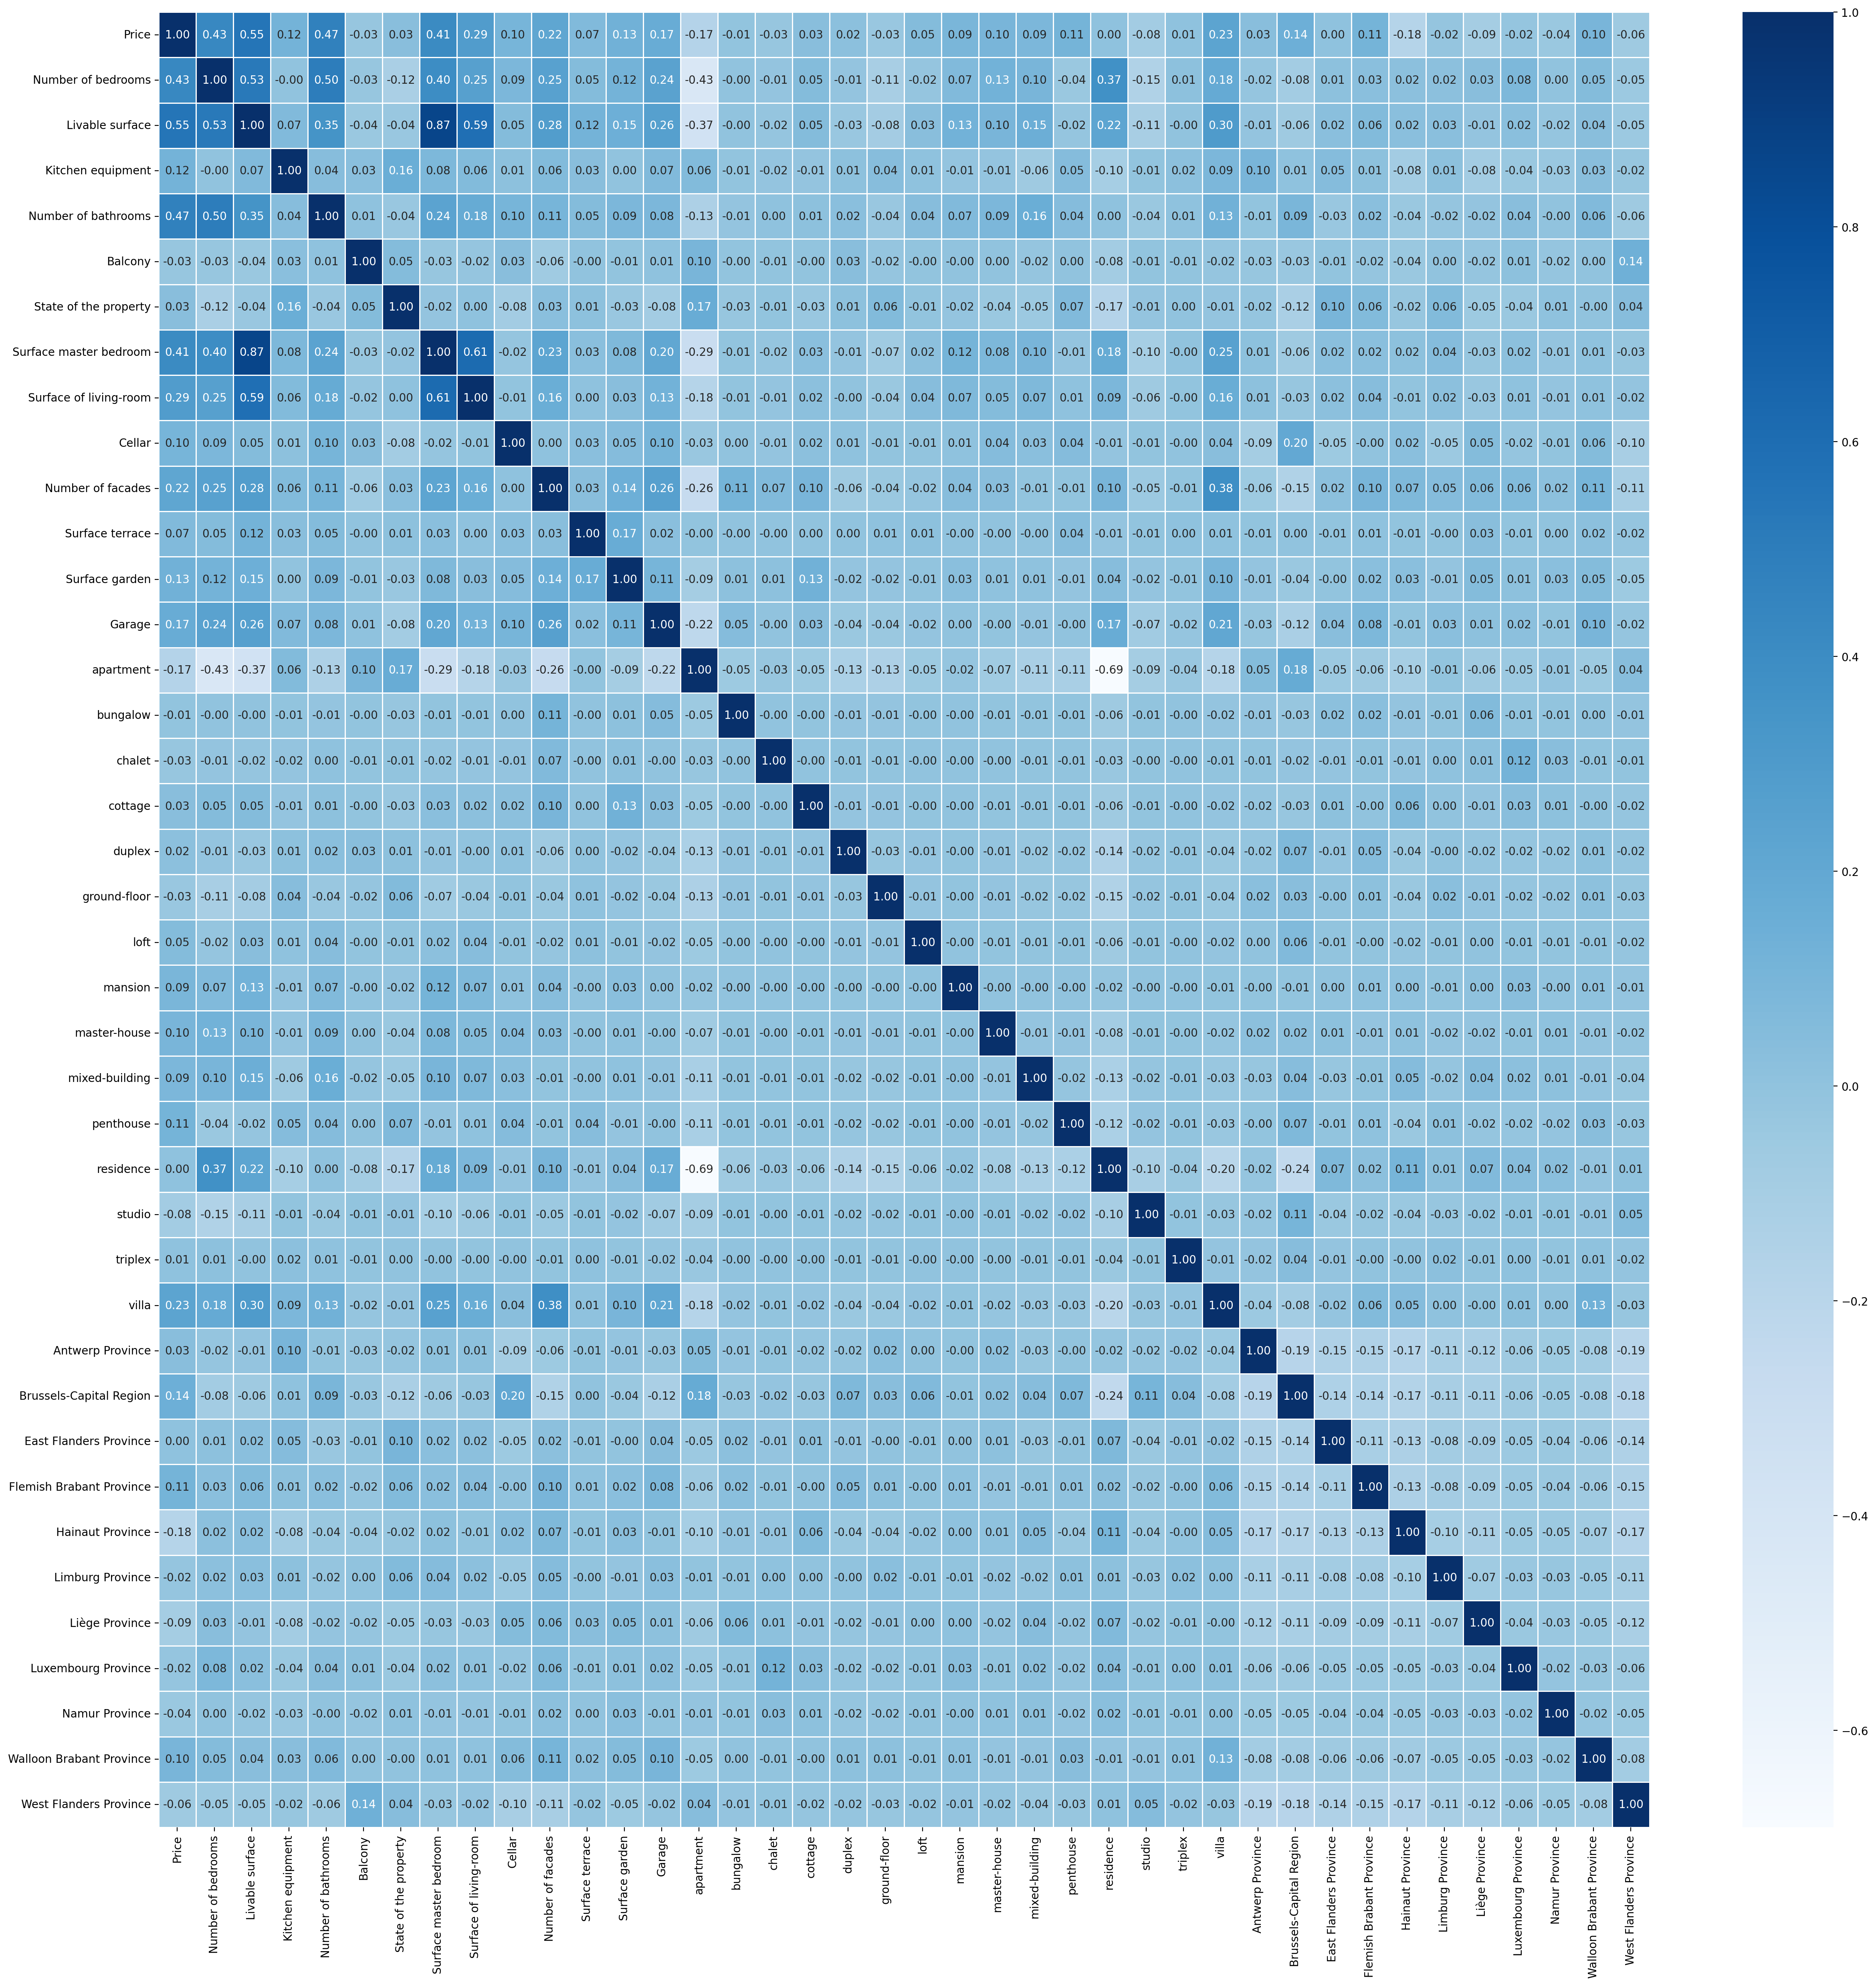

In [744]:
fig = plt.subplots(figsize=(30,30), dpi=200)

sns.heatmap(data.corr(), cmap='Blues', linewidth=0.5, annot=True, fmt=".2f")

---

### Standardization

**With MinMaxScaler**

In [156]:
df2 = data.values
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)
df2 = pd.DataFrame(df2_scaled)

In [157]:
df2.columns = data.columns
df2 = df2.drop("Surface master bedroom", axis=1)
df2.head()

Price  Number of bedrooms  Livable surface  Kitchen equipment  \
0  0.064134            0.045455         0.033011           1.000000   
1  0.072884            0.000000         0.026342           1.000000   
2  0.056731            0.045455         0.026342           0.333333   
3  0.122115            0.045455         0.072024           1.000000   
4  0.114423            0.045455         0.068690           0.333333   

   Number of bathrooms  Balcony  State of the property  \
0             0.000000      0.0                   0.25   
1             0.000000      0.0                   0.25   
2             0.000000      0.0                   0.25   
3             0.000000      0.0                   0.75   
4             0.076923      0.0                   0.75   

   Surface of living-room  Cellar  Number of facades  ...  \
0                0.006431     0.0            0.02381  ...   
1                0.005512     1.0            0.02381  ...   
2                0.006201     0.0            0.02381  ...   
3                0.014240     0.0            0.02381  ...   
4                0.013551     0.0            0.02381  ...   

   Brussels-Capital Region  East Flanders Province  Flemish Brabant Province  \
0                      1.0                     0.0                       0.0   
1                      1.0                     0.0                       0.0   
2                      1.0                     0.0                       0.0   
3                      1.0                     0.0                       0.0   
4                      1.0                     0.0                       0.0   

   Hainaut Province  Limburg Province  Liège Province  Luxembourg Province  \
0               0.0               0.0             0.0                  0.0   
1               0.0               0.0             0.0                  0.0   
2               0.0               0.0             0.0                  0.0   
3               0.0               0.0             0.0                  0.0   
4               0.0               0.0             0.0                  0.0   

   Namur Province  Walloon Brabant Province  West Flanders Province  
0             0.0                       0.0                     0.0  
1             0.0                       0.0                     0.0  
2             0.0                       0.0                     0.0  
3             0.0                       0.0                     0.0  
4             0.0                       0.0                     0.0  

[5 rows x 39 columns]

**With StandardScaler**

In [261]:
df3 = data.values
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3)
df3 = pd.DataFrame(df3_scaled)
df3.columns = data.columns
df3.head()

Price  Number of bedrooms  Livable surface  Kitchen equipment  \
0 -0.050524           -0.550877        -0.481823           1.636401   
1  0.109843           -1.293549        -0.650969           1.636401   
2 -0.186219           -0.550877        -0.650969          -0.665595   
3  1.012127           -0.550877         0.507684           1.636401   
4  0.871145           -0.550877         0.423111          -0.665595   

   Number of bathrooms   Balcony  State of the property  \
0            -0.352604 -0.144796              -0.616861   
1            -0.352604 -0.144796              -0.616861   
2            -0.352604 -0.144796              -0.616861   
3            -0.352604 -0.144796               0.810706   
4             1.222441 -0.144796               0.810706   

   Surface master bedroom  Surface of living-room    Cellar  ...  \
0               -0.424493               -0.281310 -0.562694  ...   
1                0.094849               -0.366489  1.777164  ...   
2               -0.619246               -0.302605 -0.562694  ...   
3                0.354520                0.442711 -0.562694  ...   
4               -0.229740                0.378827 -0.562694  ...   

   Brussels-Capital Region  East Flanders Province  Flemish Brabant Province  \
0                 2.366786               -0.329087                 -0.335402   
1                 2.366786               -0.329087                 -0.335402   
2                 2.366786               -0.329087                 -0.335402   
3                 2.366786               -0.329087                 -0.335402   
4                 2.366786               -0.329087                 -0.335402   

   Hainaut Province  Limburg Province  Liège Province  Luxembourg Province  \
0         -0.393947         -0.248595       -0.270869            -0.137352   
1         -0.393947         -0.248595       -0.270869            -0.137352   
2         -0.393947         -0.248595       -0.270869            -0.137352   
3         -0.393947         -0.248595       -0.270869            -0.137352   
4         -0.393947         -0.248595       -0.270869            -0.137352   

   Namur Province  Walloon Brabant Province  West Flanders Province  
0       -0.119729                 -0.182705               -0.436458  
1       -0.119729                 -0.182705               -0.436458  
2       -0.119729                 -0.182705               -0.436458  
3       -0.119729                 -0.182705               -0.436458  
4       -0.119729                 -0.182705               -0.436458  

[5 rows x 40 columns]

---

## Linear Regressions

### *As is* Data

In [382]:
X = np.array(data.loc[:, "Number of bedrooms":])
y = np.array(data["Price"])

In [383]:
X.shape

(17336, 39)

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [385]:
reg = LinearRegression().fit(X_train, y_train)

In [386]:
reg.score(X_train, y_train)

0.5169885548574442

In [387]:
y_pred = reg.predict(X_test)

In [388]:
print(r2_score(y_test, y_pred))

0.4279752231202214


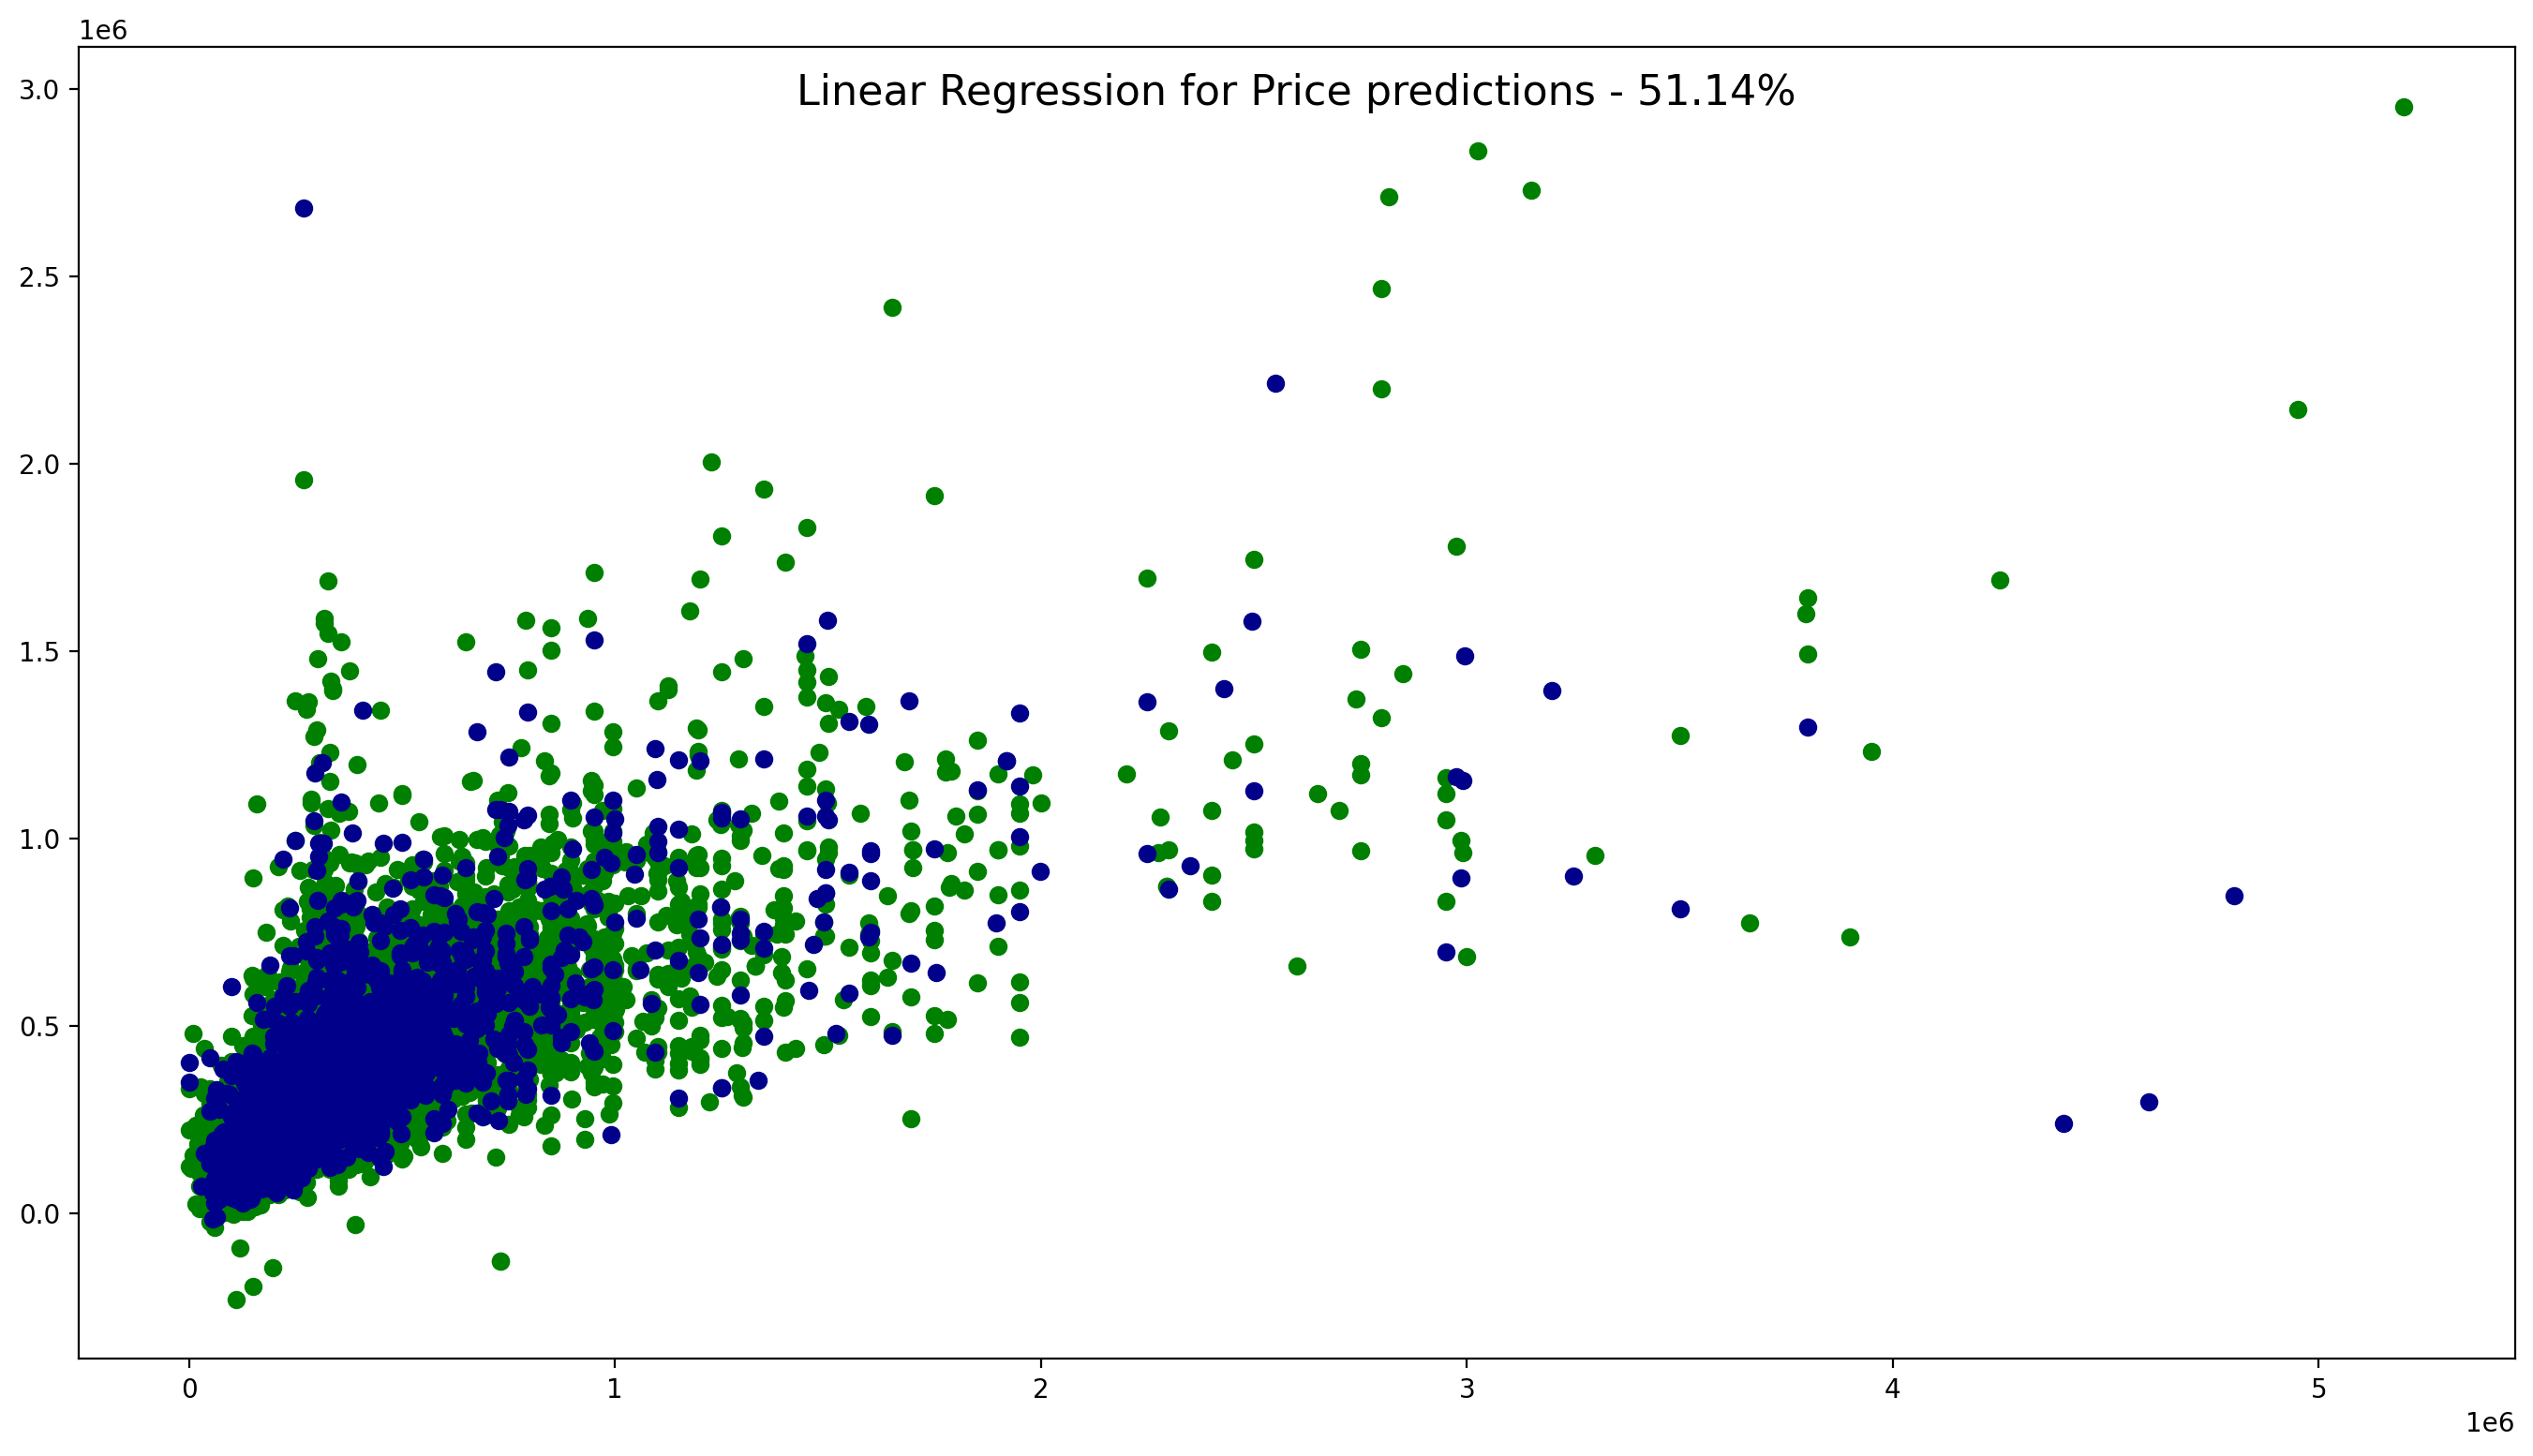

In [391]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Linear Regression for Price predictions - 51.14%", fontsize=16)


plt.scatter(y_train, reg.predict(X_train), color="green", label="Train Data")
plt.scatter(y_test, y_pred,color="darkblue", label="Test Data")


plt.show()

### Standardised Data

In [207]:
X = np.array(df2.loc[:, "Number of bedrooms":])
y = np.array(df2["Price"])

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [214]:
reg = LinearRegression().fit(X_train, y_train)

In [215]:
reg.score(X_train, y_train)

0.48972122690298203

In [216]:
y_pred = reg.predict(X_test)

In [217]:
print(r2_score(y_test, y_pred))

0.4935050772700529


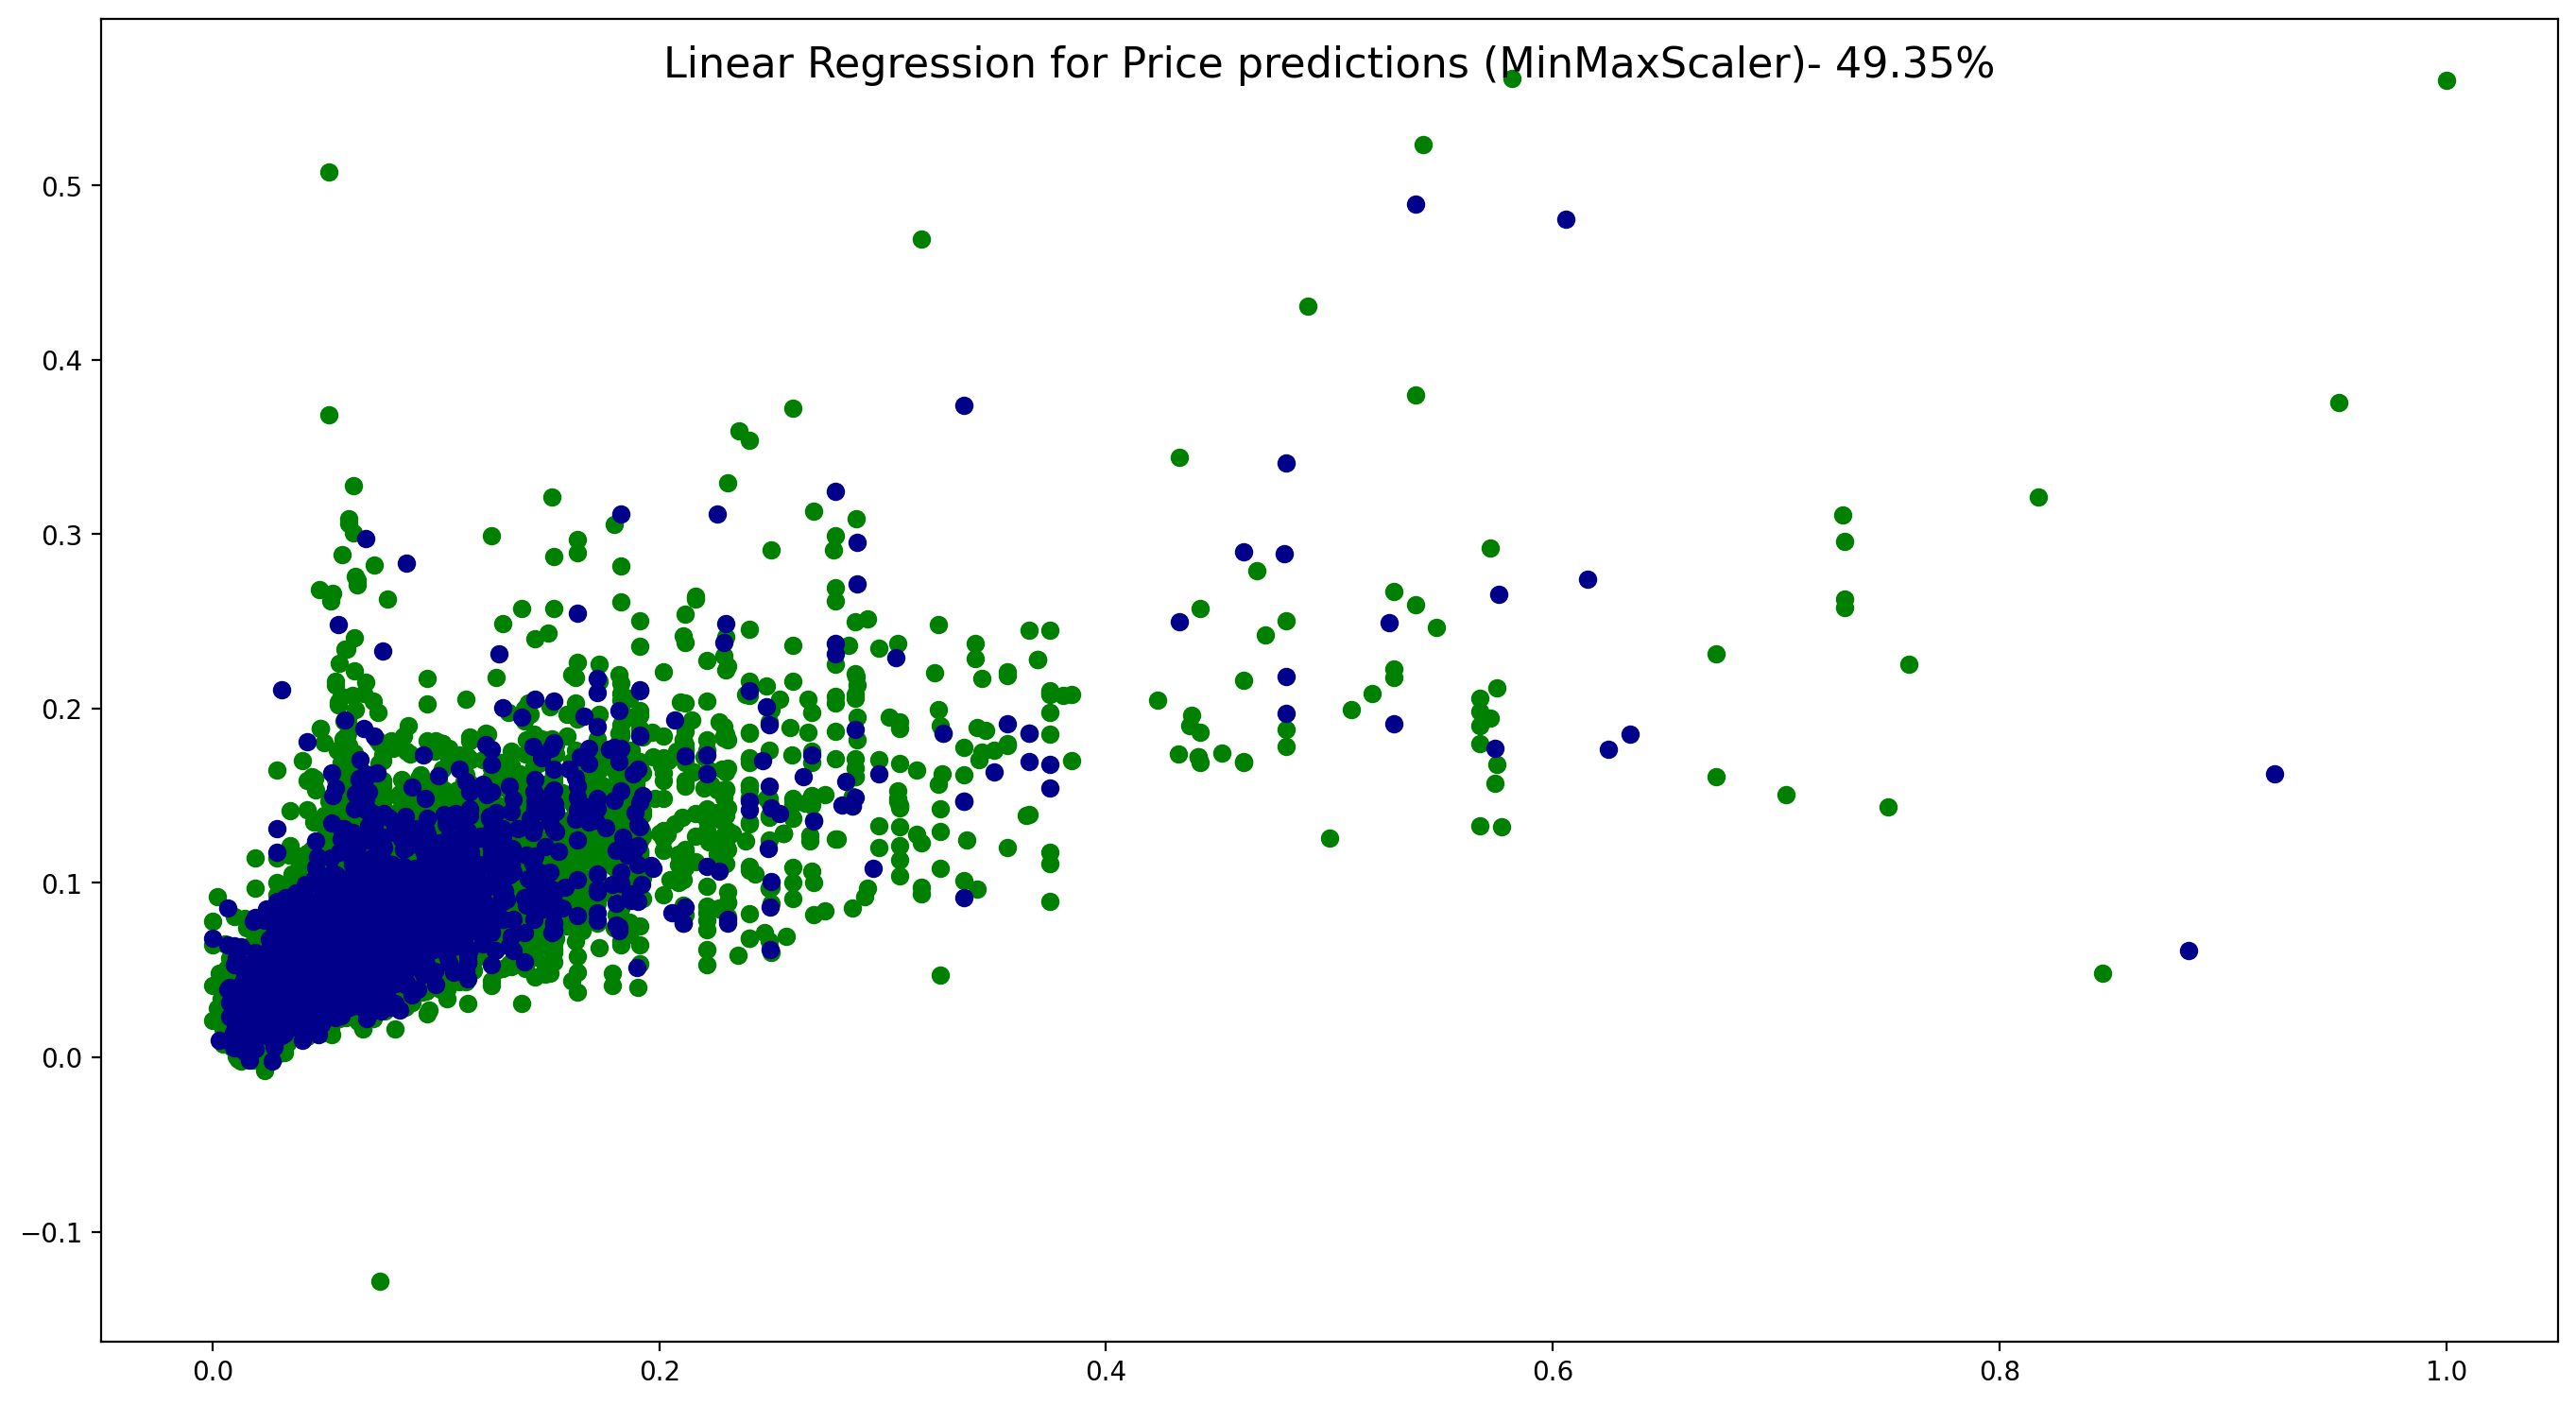

In [218]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Linear Regression for Price predictions (MinMaxScaler)- 49.35%", fontsize=16)


plt.scatter(y_train, reg.predict(X_train), color="green", label="Train Data")
plt.scatter(y_test, y_pred,color="darkblue", label="Test Data")


plt.show()

---

In [274]:
X = np.array(df3.loc[:, "Number of bedrooms":])
y = np.array(df3["Price"])

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [276]:
reg = LinearRegression().fit(X_train, y_train)

In [277]:
reg.score(X_train, y_train)

0.49363835649406496

In [278]:
y_pred = reg.predict(X_test)

In [279]:
print(r2_score(y_test, y_pred))

0.5028131664406608


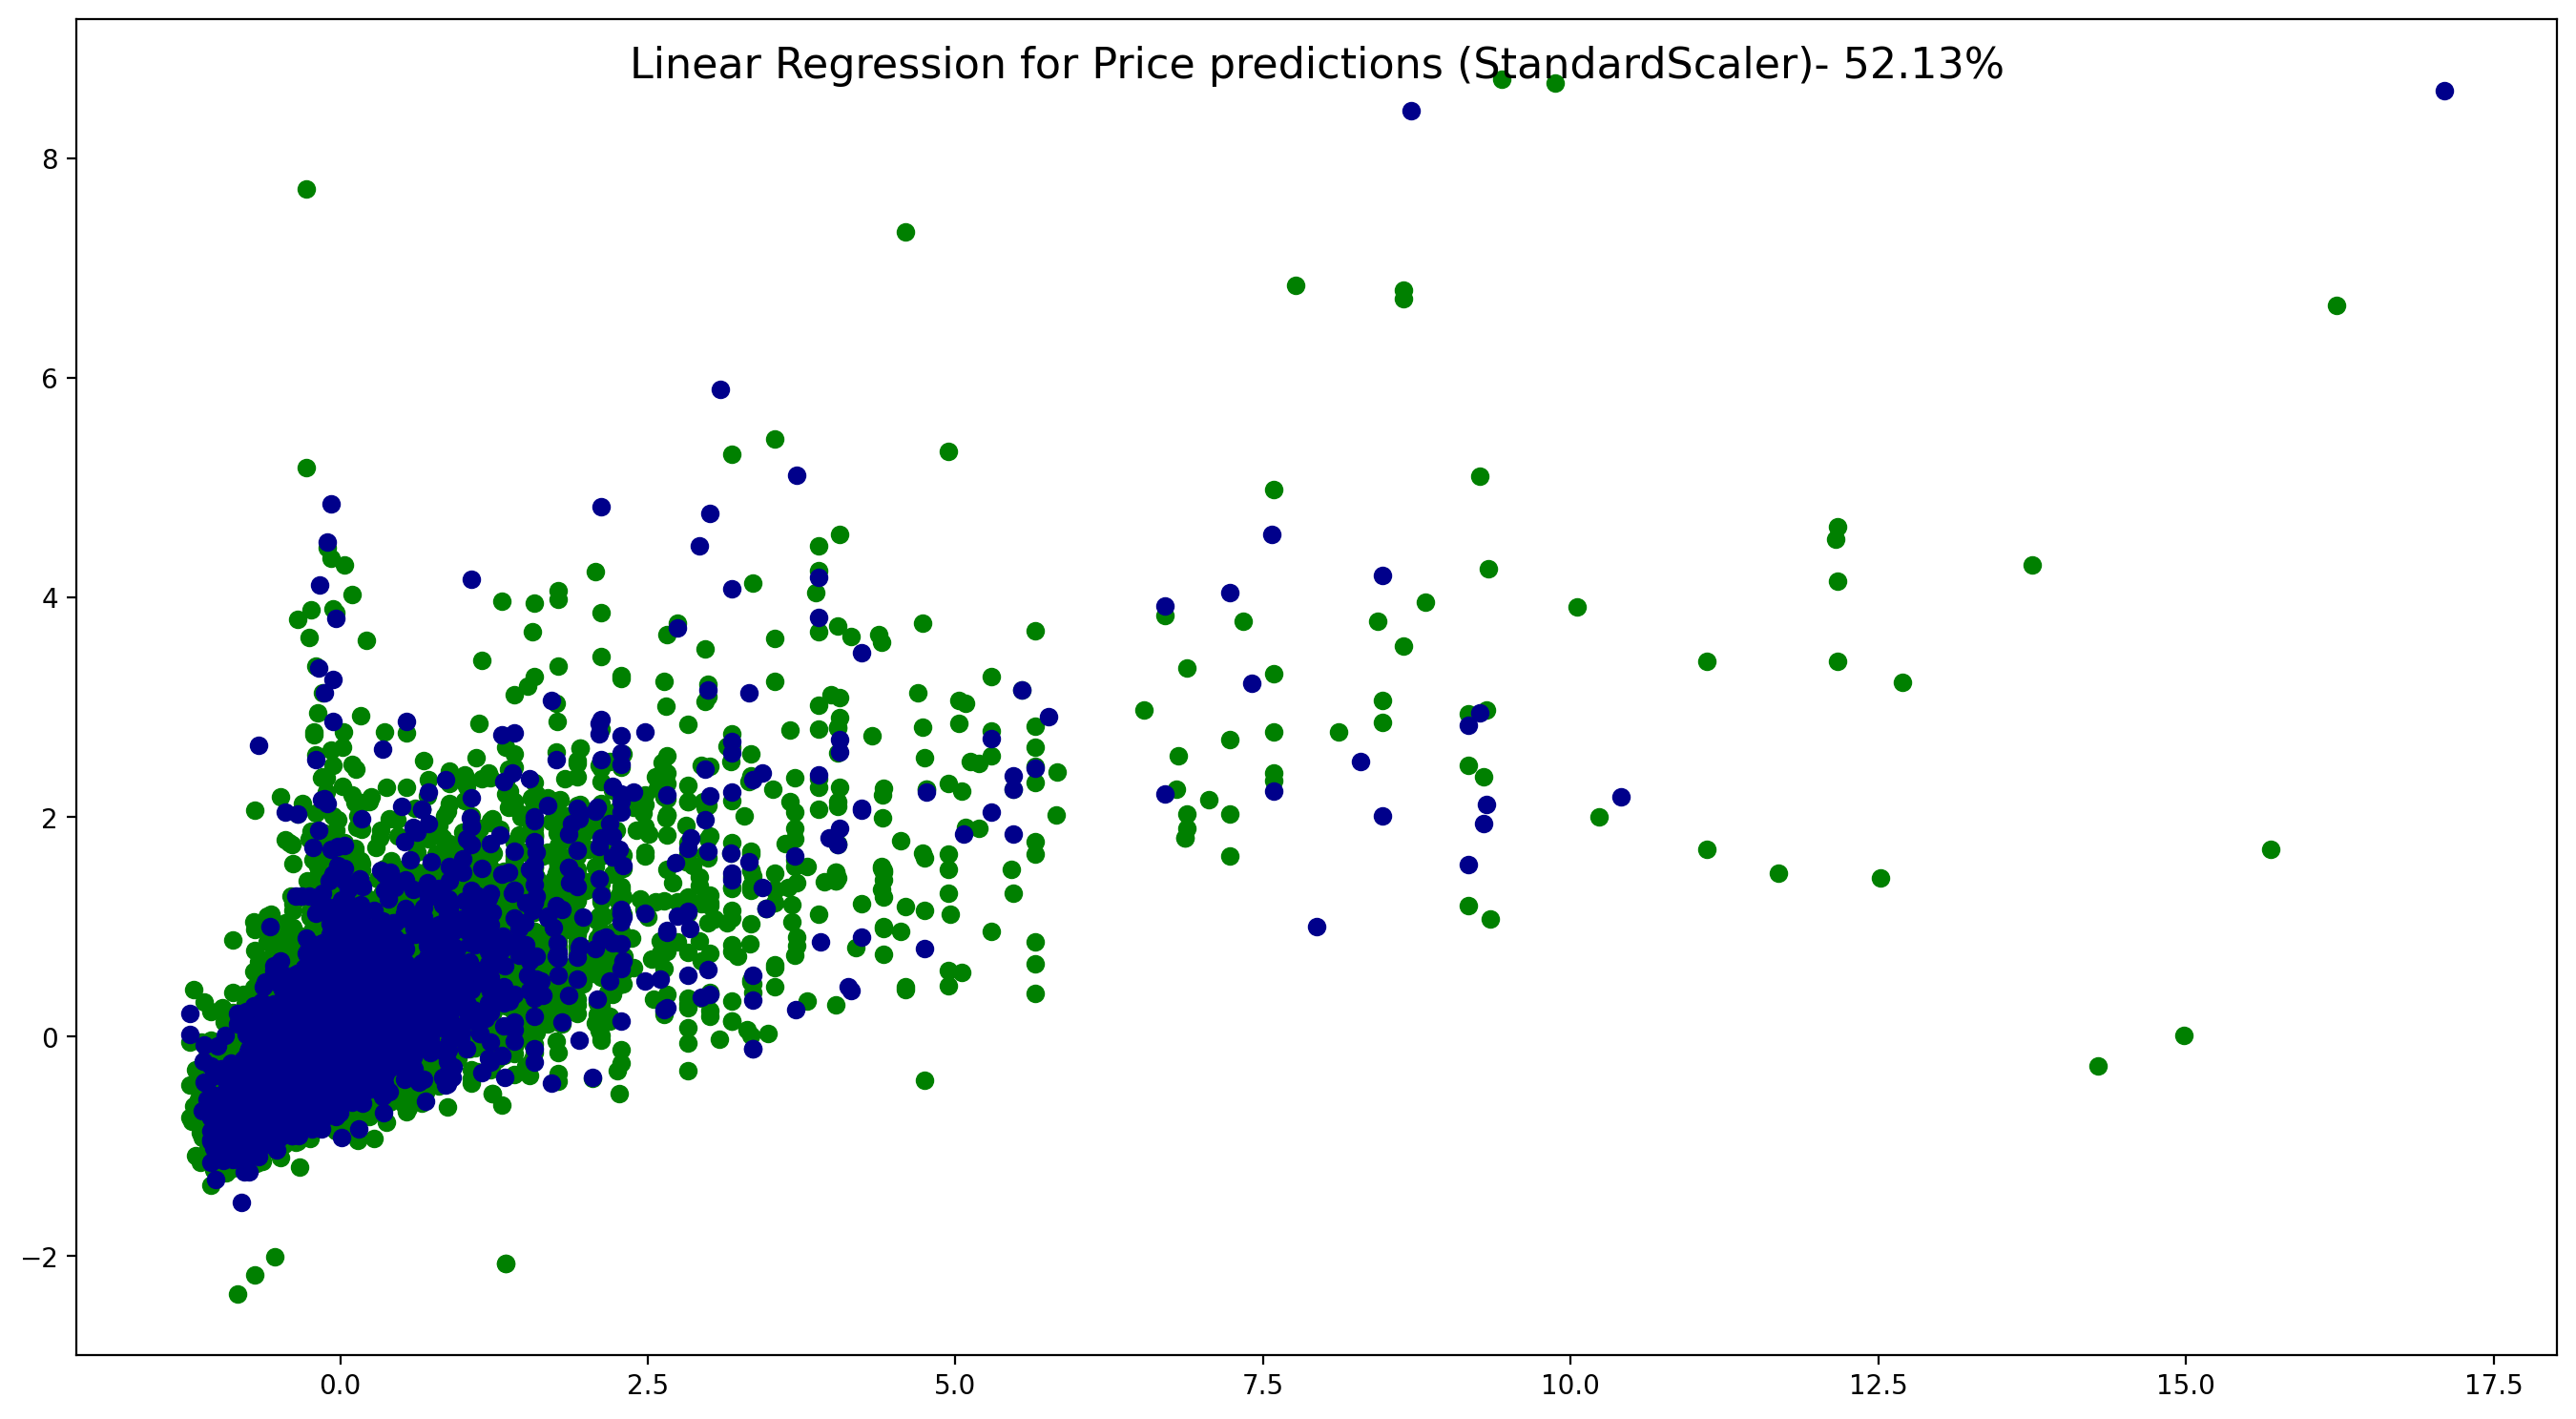

In [145]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Linear Regression for Price predictions (StandardScaler)- 52.13%", fontsize=16)


plt.scatter(y_train, reg.predict(X_train), color="green", label="Train Data")
plt.scatter(y_test, y_pred,color="darkblue", label="Test Data")


plt.show()

### Plots (As-is data)

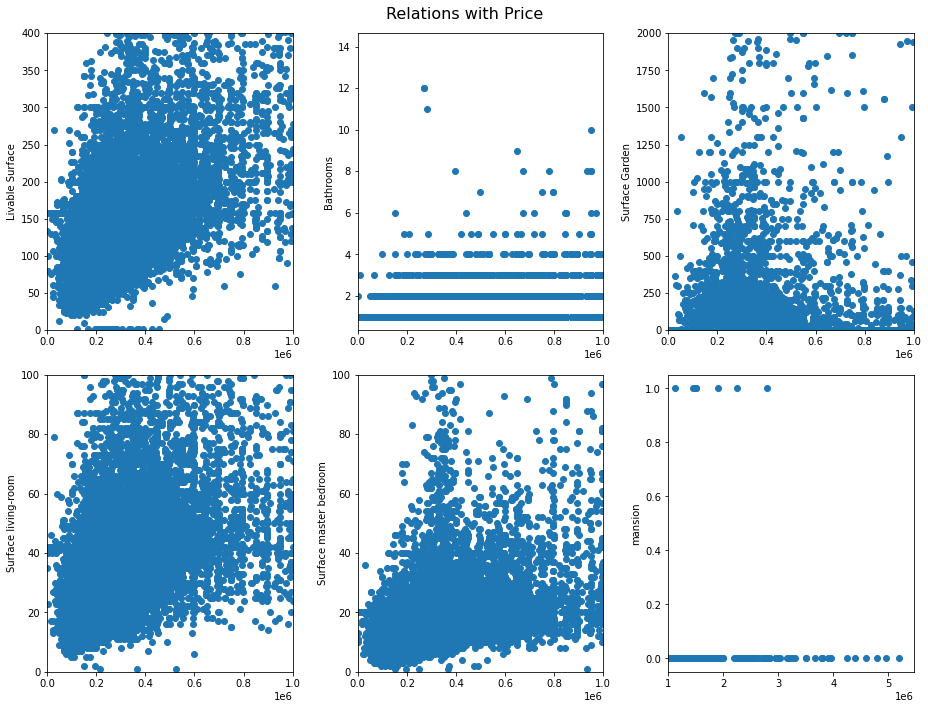

In [19]:
a = data["Price"]
b = data["Livable surface"]
c = data["Number of bathrooms"]
d = data["Surface garden"]
e = data["Surface of living-room"]
f = data["Surface master bedroom"]
g = data["mansion"]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
fig.suptitle("Relations with Price", fontsize=16)


axes[0][0].scatter(a, b)
axes[0][0].set_ylabel("Livable Surface")
axes[0][0].set_xlim(0, 1000000)
axes[0][0].set_ylim(0, 400)


axes[0][1].scatter(a, c)
axes[0][1].set_ylabel("Bathrooms")
axes[0][1].set_xlim(0, 1000000)

axes[0][2].scatter(a, d)
axes[0][2].set_ylabel("Surface Garden")
axes[0][2].set_xlim(0, 1000000)
axes[0][2].set_ylim(0, 2000)

axes[1][0].scatter(a, e)
axes[1][0].set_ylabel("Surface living-room")
axes[1][0].set_xlim(0, 1000000)
axes[1][0].set_ylim(0, 100)

axes[1][1].scatter(a, f)
axes[1][1].set_ylabel("Surface master bedroom")
axes[1][1].set_xlim(0, 1000000)
axes[1][1].set_ylim(0, 100)

axes[1][2].scatter(a, g)
axes[1][2].set_ylabel("mansion")
axes[1][2].set_xlim(1000000,)


plt.tight_layout()
plt.show()

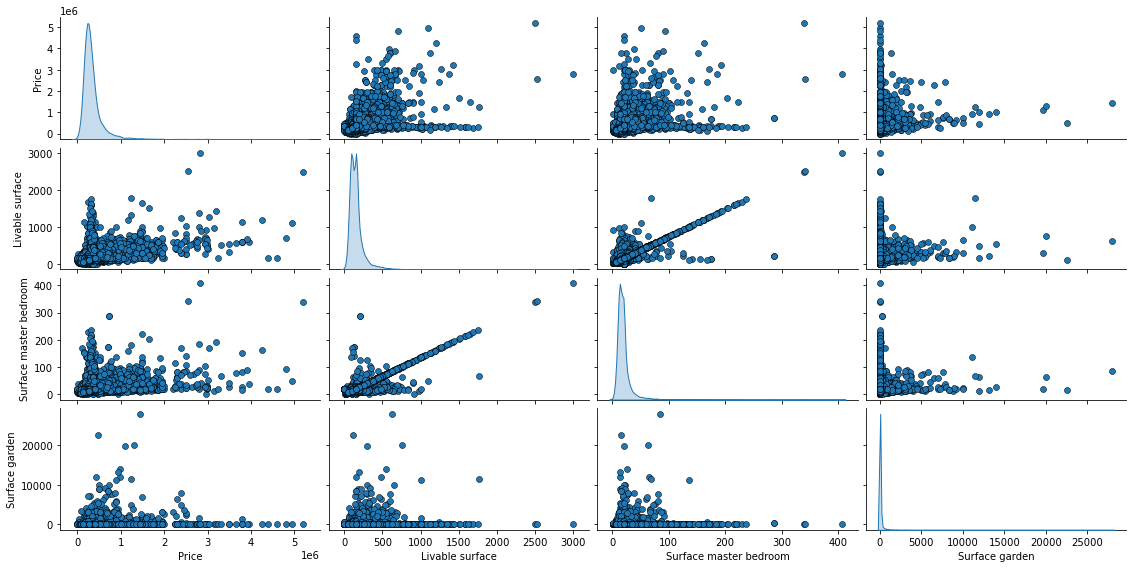

In [20]:
cols = ["Price", "Livable surface", "Surface master bedroom", "Surface garden"]

pp = sns.pairplot(
    data[cols], height=2, aspect=2, plot_kws=dict(edgecolor="k", linewidth=0.5),
    diag_kind="kde", diag_kws=dict(shade=True)
)

fig = pp.fig

### Plots (Standardized data)


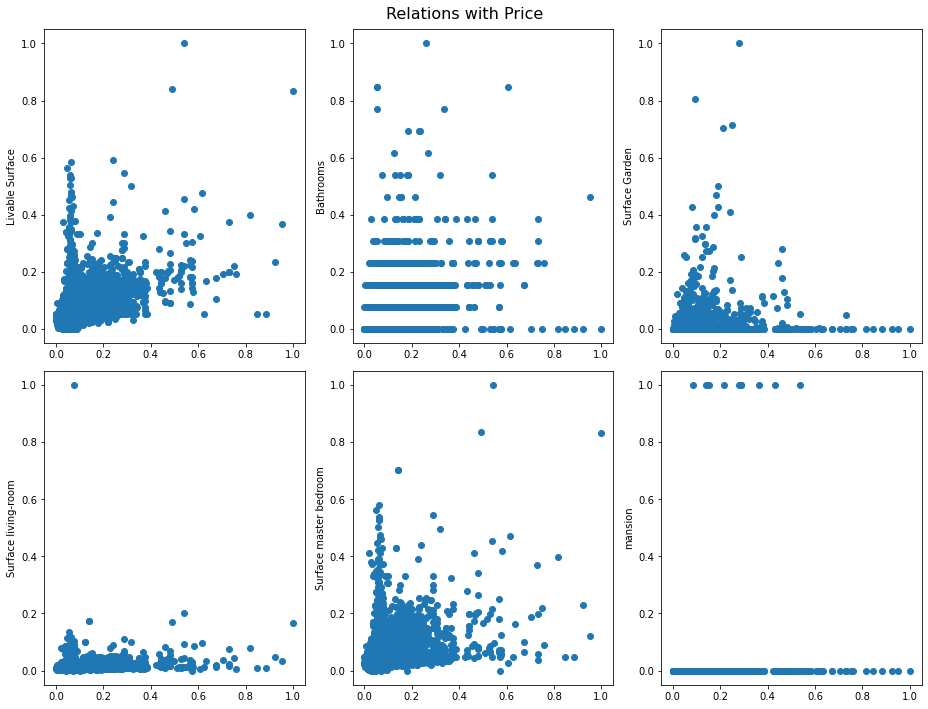

In [22]:
a = df2["Price"]
b = df2["Livable surface"]
c = df2["Number of bathrooms"]
d = df2["Surface garden"]
e = df2["Surface of living-room"]
f = df2["Surface master bedroom"]
g = df2["mansion"]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
fig.suptitle("Relations with Price", fontsize=16)


axes[0][0].scatter(a, b)
axes[0][0].set_ylabel("Livable Surface")

axes[0][1].scatter(a, c)
axes[0][1].set_ylabel("Bathrooms")

axes[0][2].scatter(a, d)
axes[0][2].set_ylabel("Surface Garden")

axes[1][0].scatter(a, e)
axes[1][0].set_ylabel("Surface living-room")

axes[1][1].scatter(a, f)
axes[1][1].set_ylabel("Surface master bedroom")

axes[1][2].scatter(a, g)
axes[1][2].set_ylabel("mansion")


plt.tight_layout()
plt.show()

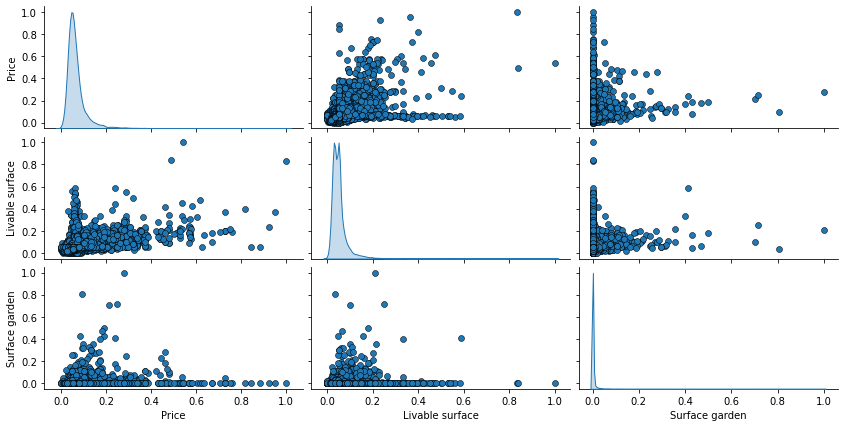

In [98]:
cols = ["Price", "Livable surface", "Surface garden"]

pp = sns.pairplot(
    df2[cols], height=2, aspect=2, plot_kws=dict(edgecolor="k", linewidth=0.5),
    diag_kind="kde", diag_kws=dict(shade=True)
)

fig = pp.fig

## Polynomial Regressions
---

#### Without OHE regions and property types and degree 3 (13 features): 

In [375]:
X = np.array(data.loc[:, "Number of bedrooms": "Garage"])
y = np.array(data["Price"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [376]:
X_train.shape, y_train.shape

((13868, 13), (13868, 1))

In [377]:
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [378]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [379]:
poly_reg.score(X_train, y_train)

0.6481927071429232

In [380]:
y_pred = poly_reg.predict(X_test)

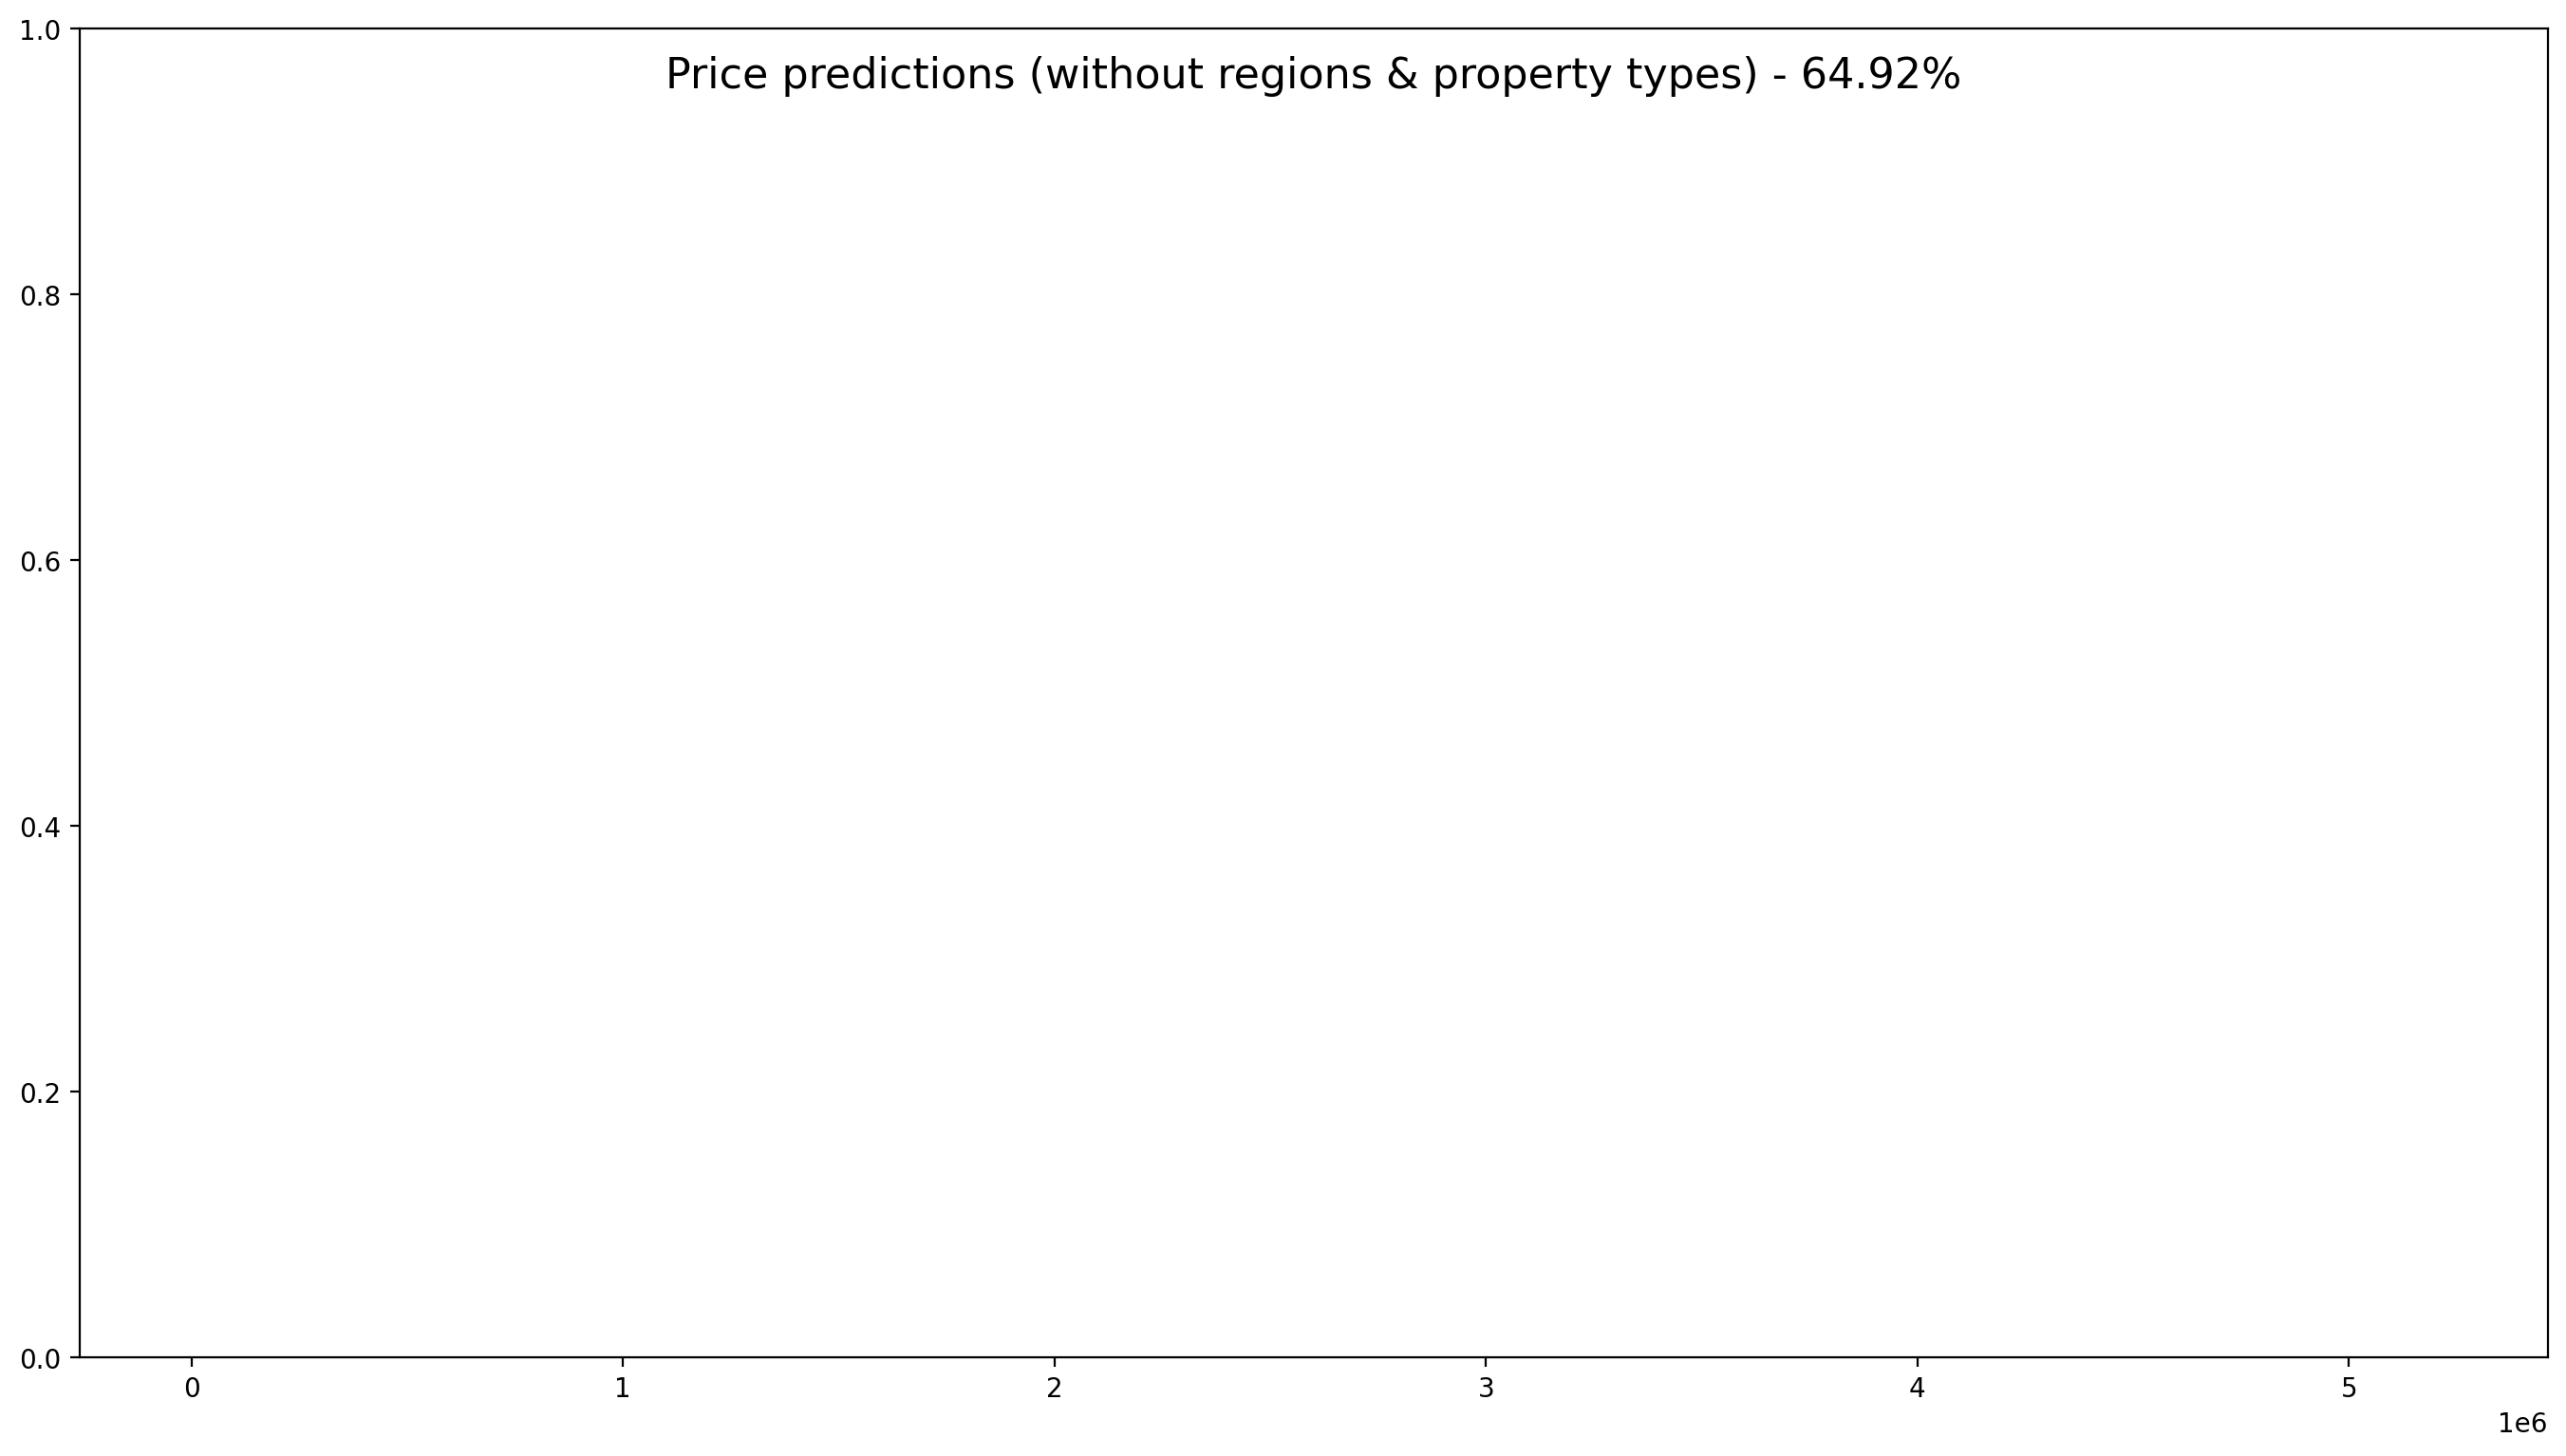

In [367]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Price predictions (without regions & property types) - 64.92%", fontsize=16)


plt.scatter(y_train, poly_reg.predict(X_train), color="deepskyblue")
plt.scatter(y_test, y_pred,color="darkblue")


plt.show()

#### Without OHE regions and degree 3 (28 features):

In [340]:
X = np.array(data.loc[:, "Number of bedrooms": "villa"])
y = np.array(data["Price"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [341]:
X_train.shape, y_train.shape

((13868, 28), (13868, 1))

In [342]:
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [343]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [344]:
poly_reg.score(X_train, y_train)

0.7354927248844658

In [345]:
y_pred = poly_reg.predict(X_test)

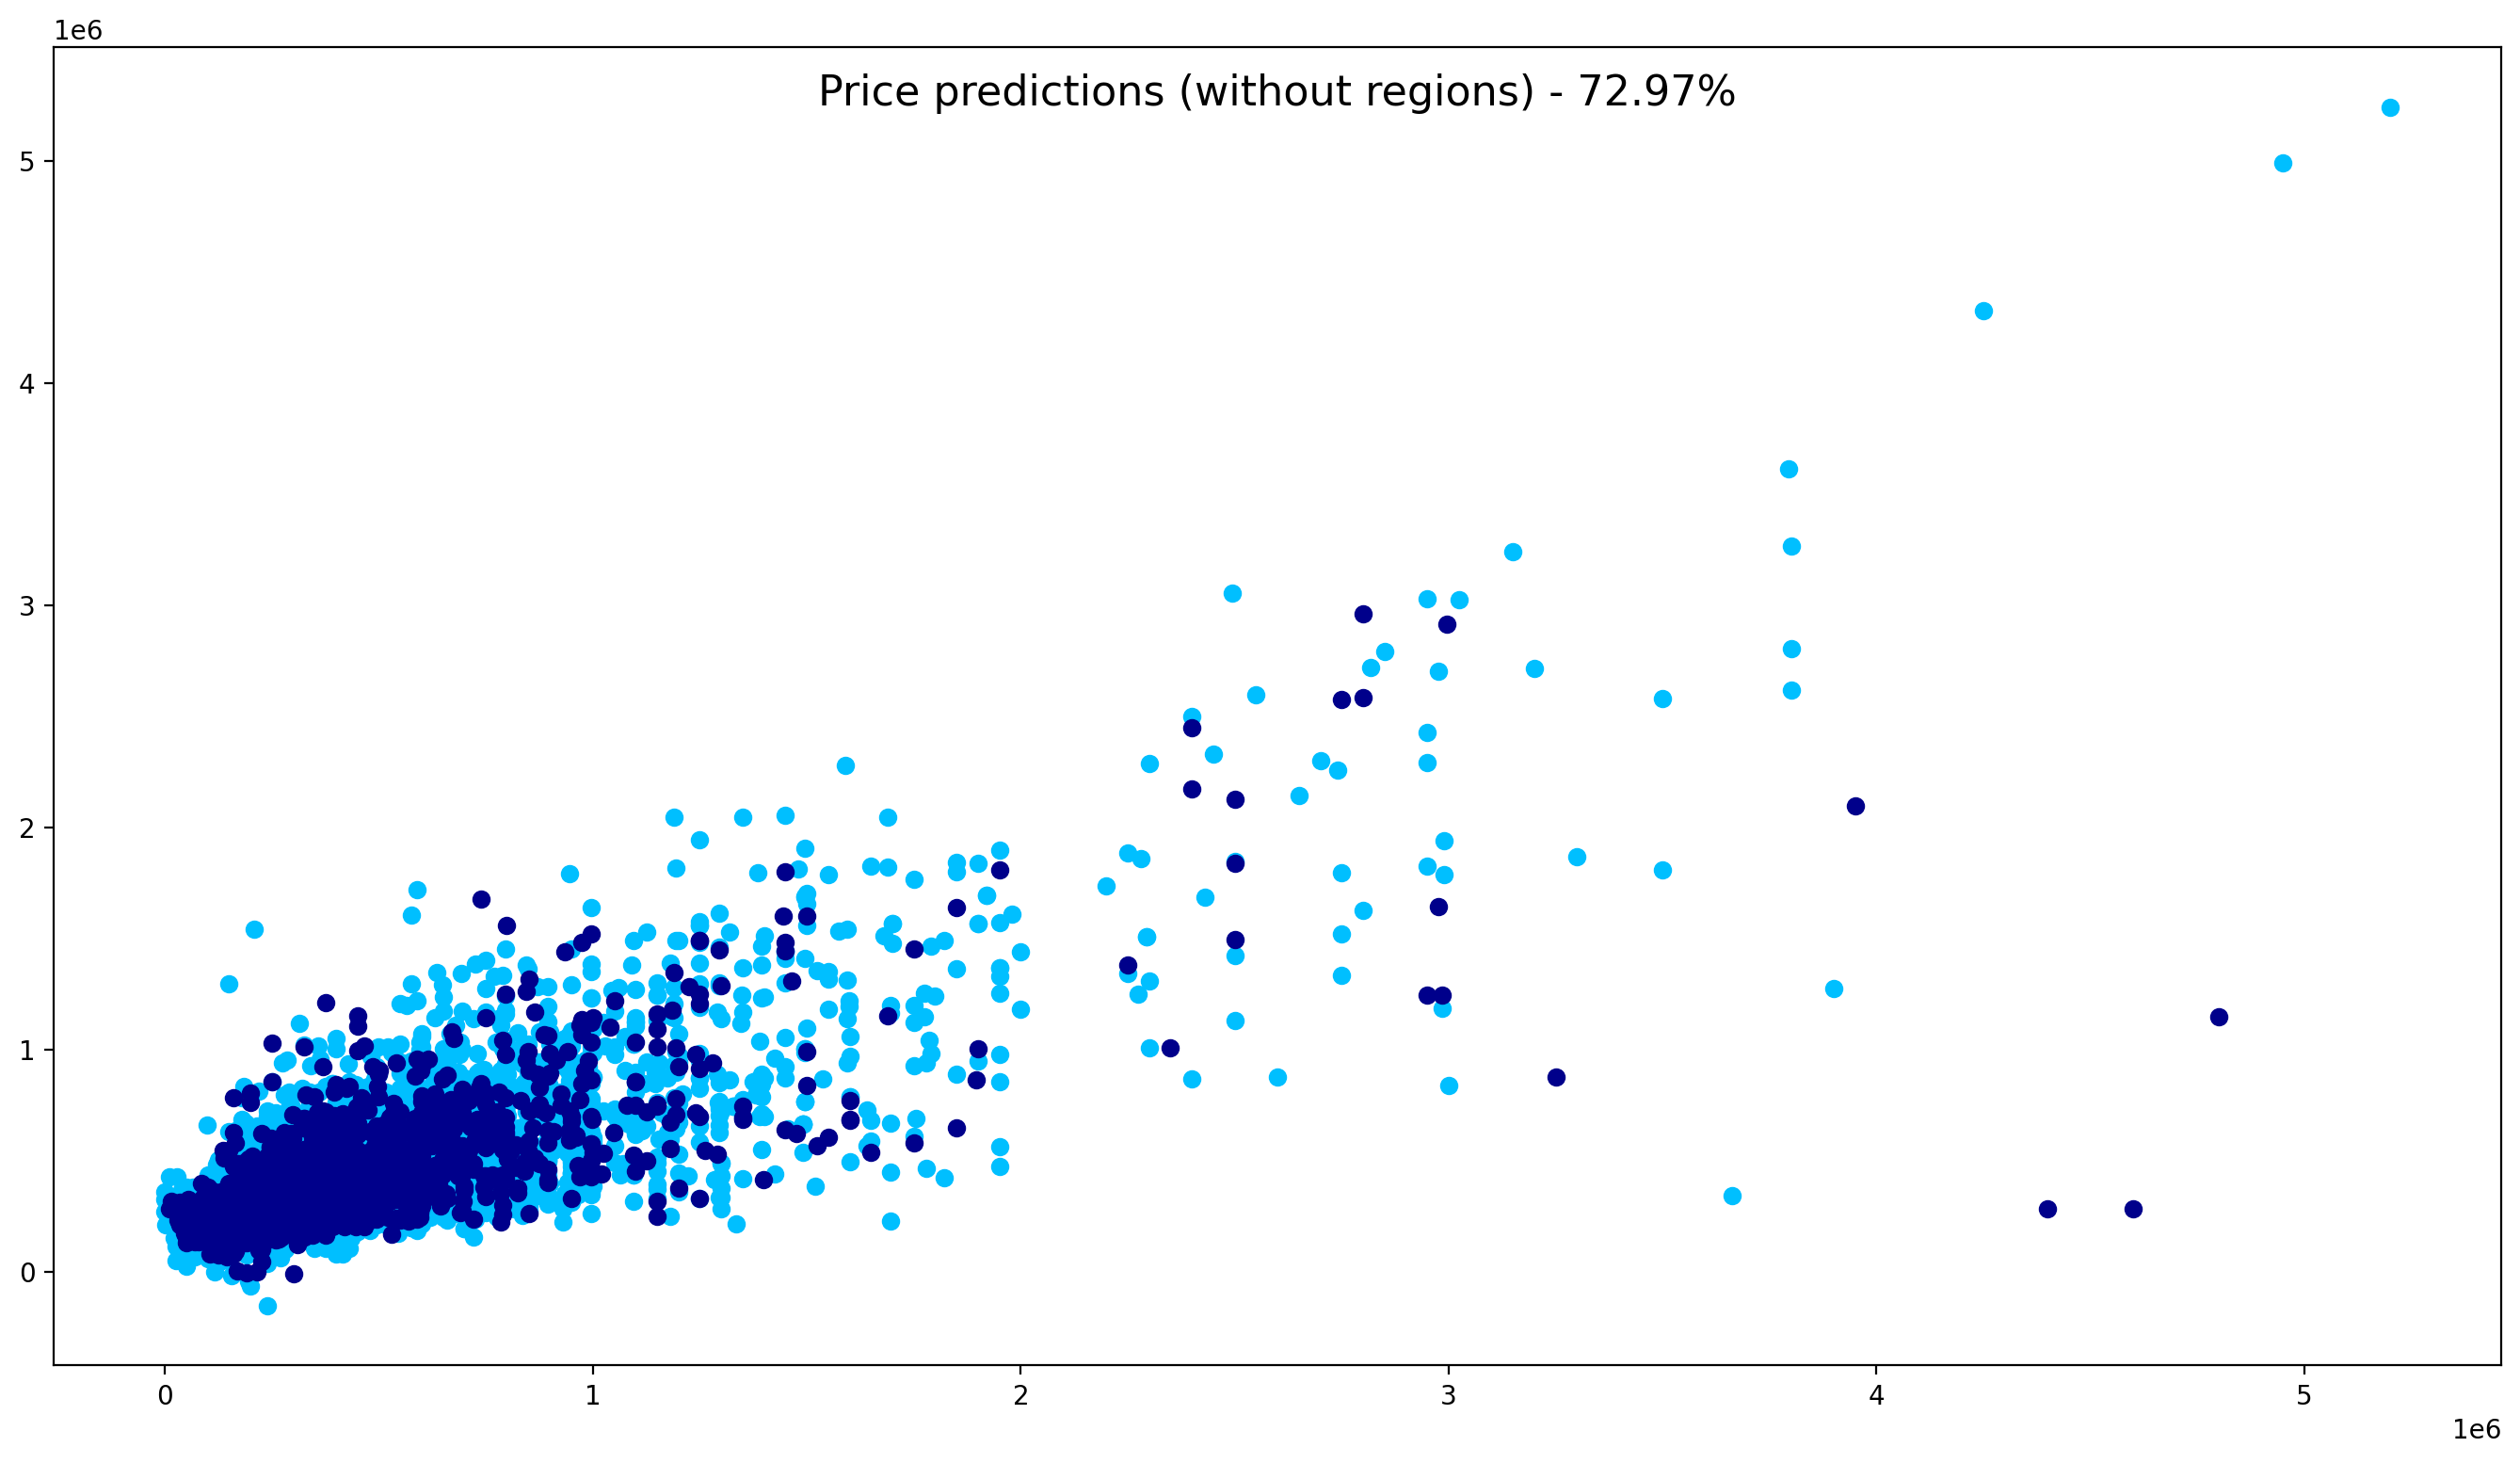

In [313]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Price predictions (without regions) - 72.97%", fontsize=16)


plt.scatter(y_train, poly_reg.predict(X_train), color="deepskyblue")
plt.scatter(y_test, y_pred,color="darkblue")


plt.show()

---

#### With all 39 features and degree 3:

In [729]:
X = np.array(data.loc[:, "Number of bedrooms":])
y = np.array(data["Price"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [730]:
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [731]:
poly_reg.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [732]:
poly_reg.score(X, y)

0.8308270521285657

In [733]:
y_pred = poly_reg.predict(X_test)

In [734]:
print(r2_score(y_test, y_pred))

0.8201602531065967


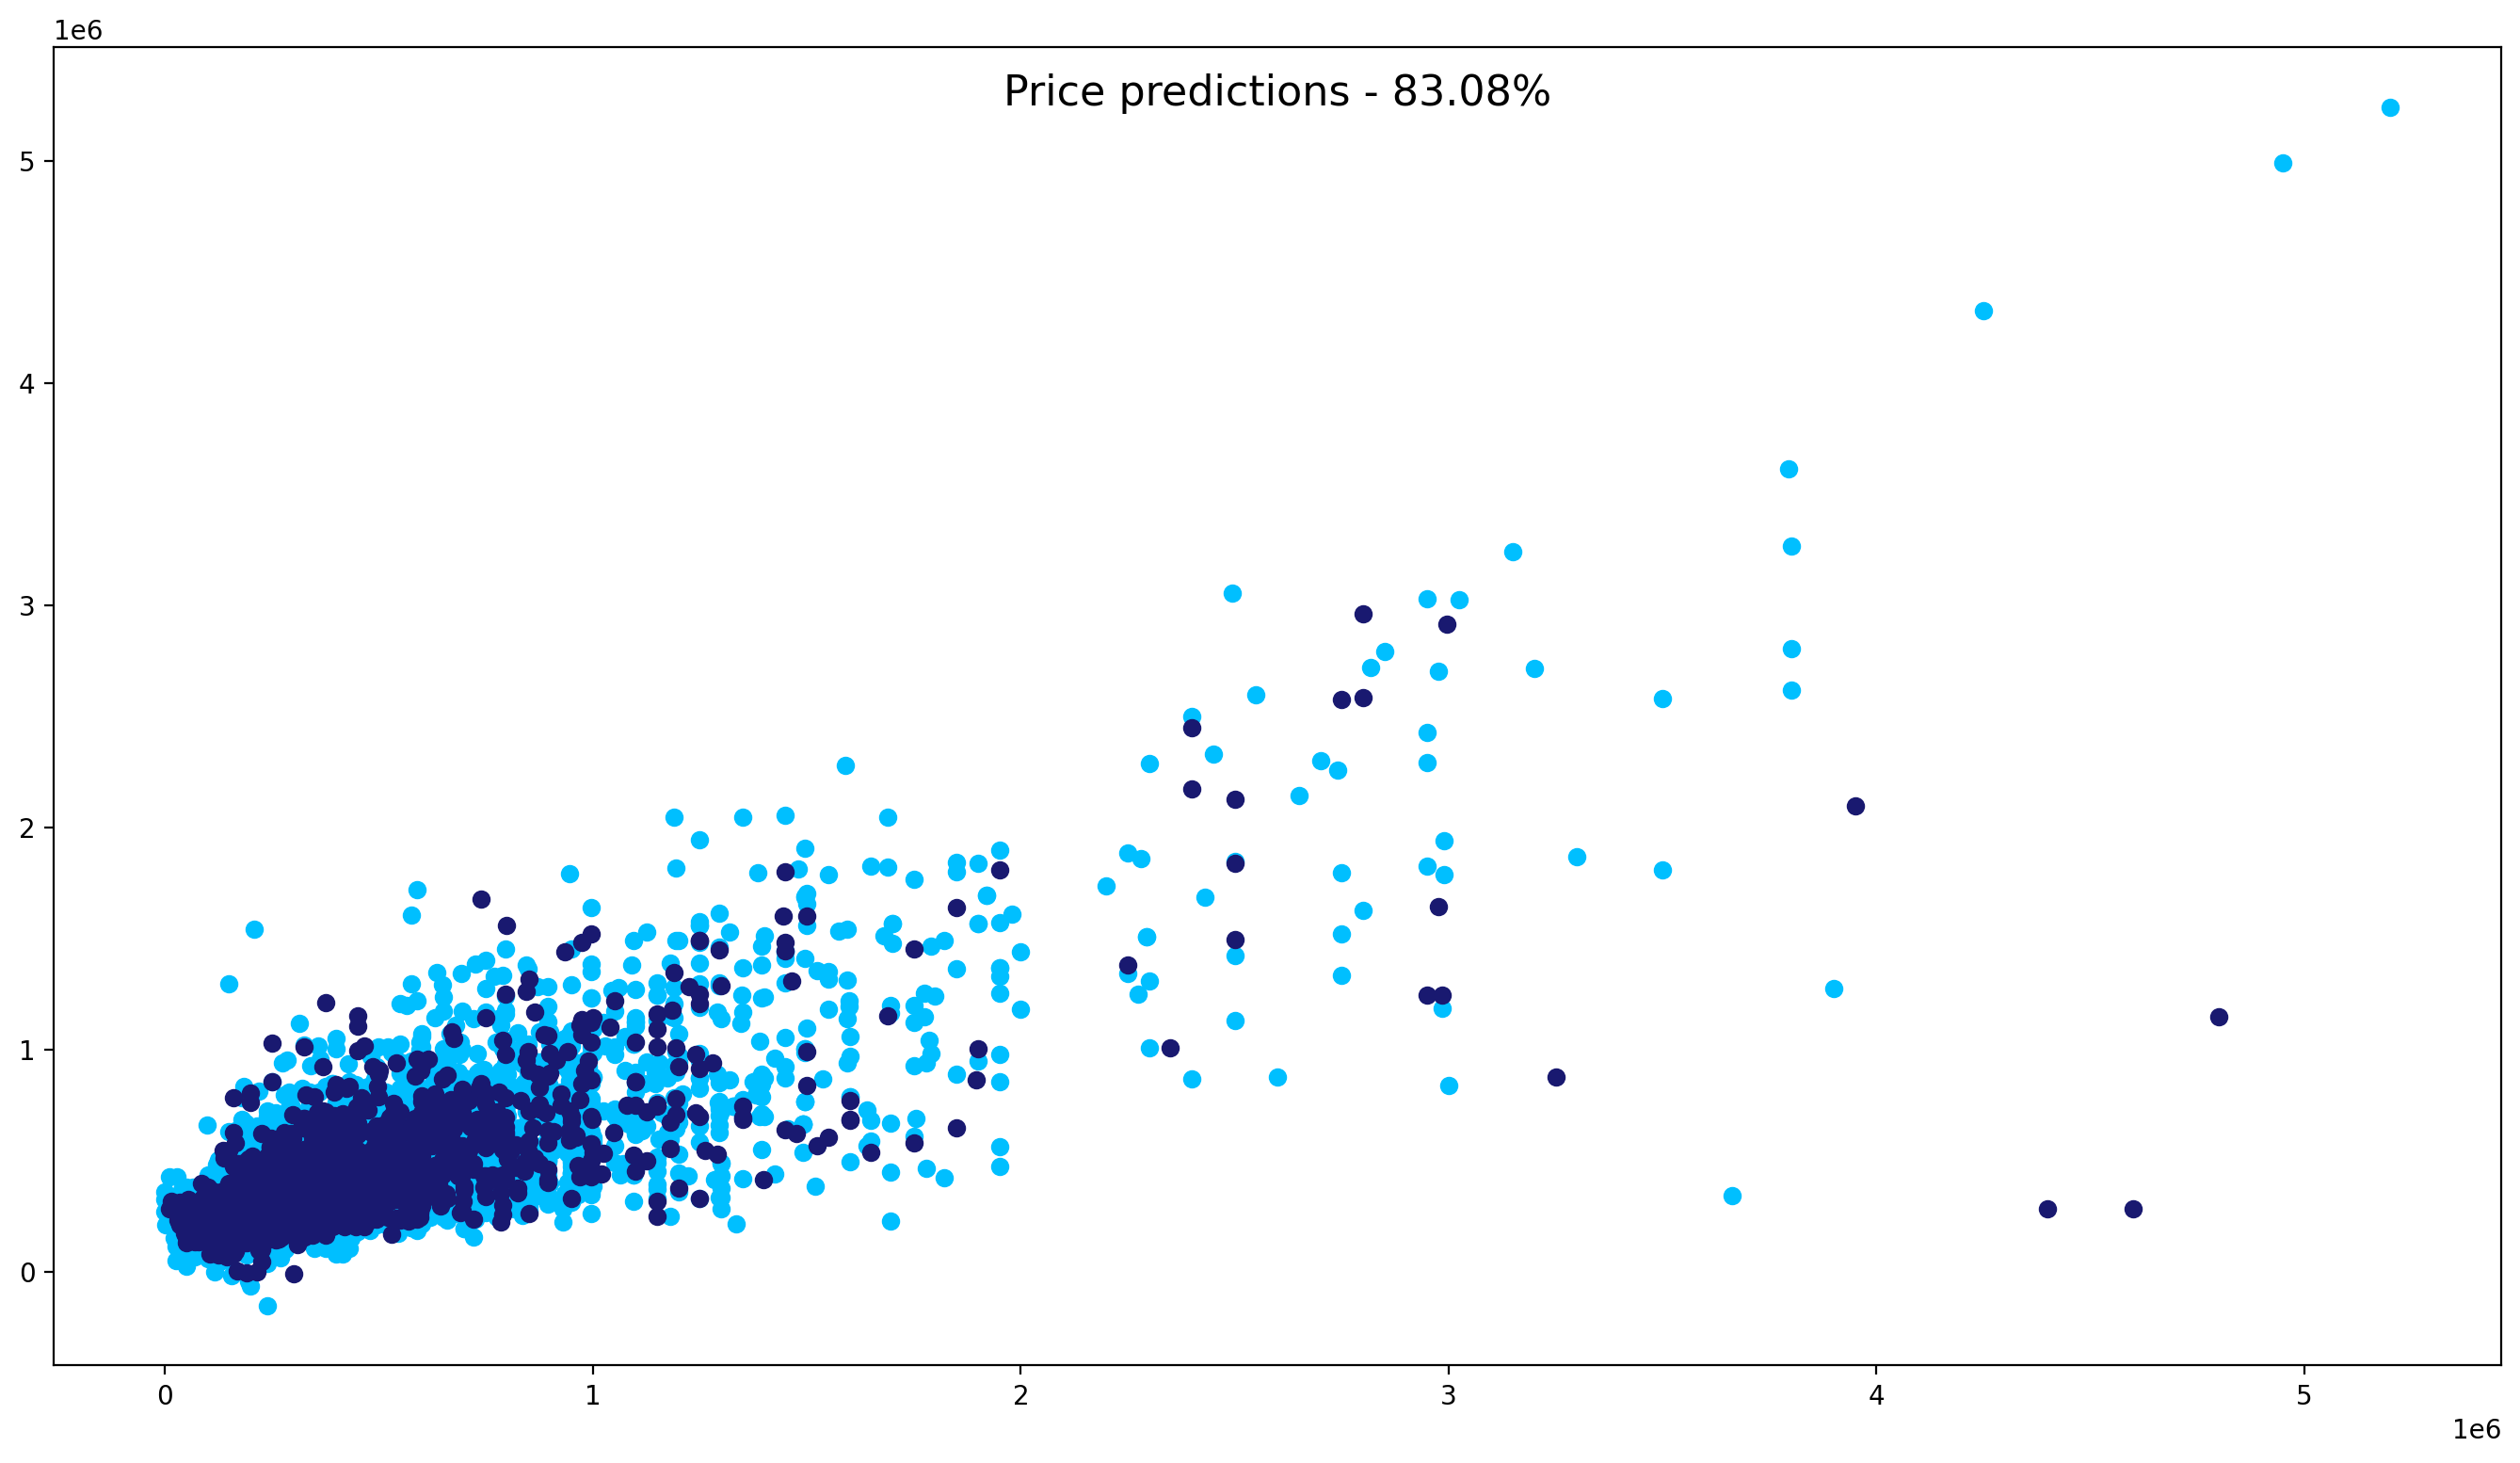

In [312]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Price predictions - 83.08%", fontsize=16)


plt.scatter(y_train, poly_reg.predict(X_train), color="deepskyblue")
plt.scatter(y_test, y_pred,color="midnightblue")


plt.show()

---

### Some trials with normalized data

#### With all 39 features and degree 3:

In [280]:
X = np.array(df3.loc[:, "Number of bedrooms":])
y = np.array(df3["Price"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [281]:
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [282]:
poly_reg.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [283]:
poly_reg.score(X, y)

0.8307321909884967

In [284]:
y_pred = poly_reg.predict(X_test)

In [285]:
print(r2_score(y_test, y_pred))

0.7534006402264771


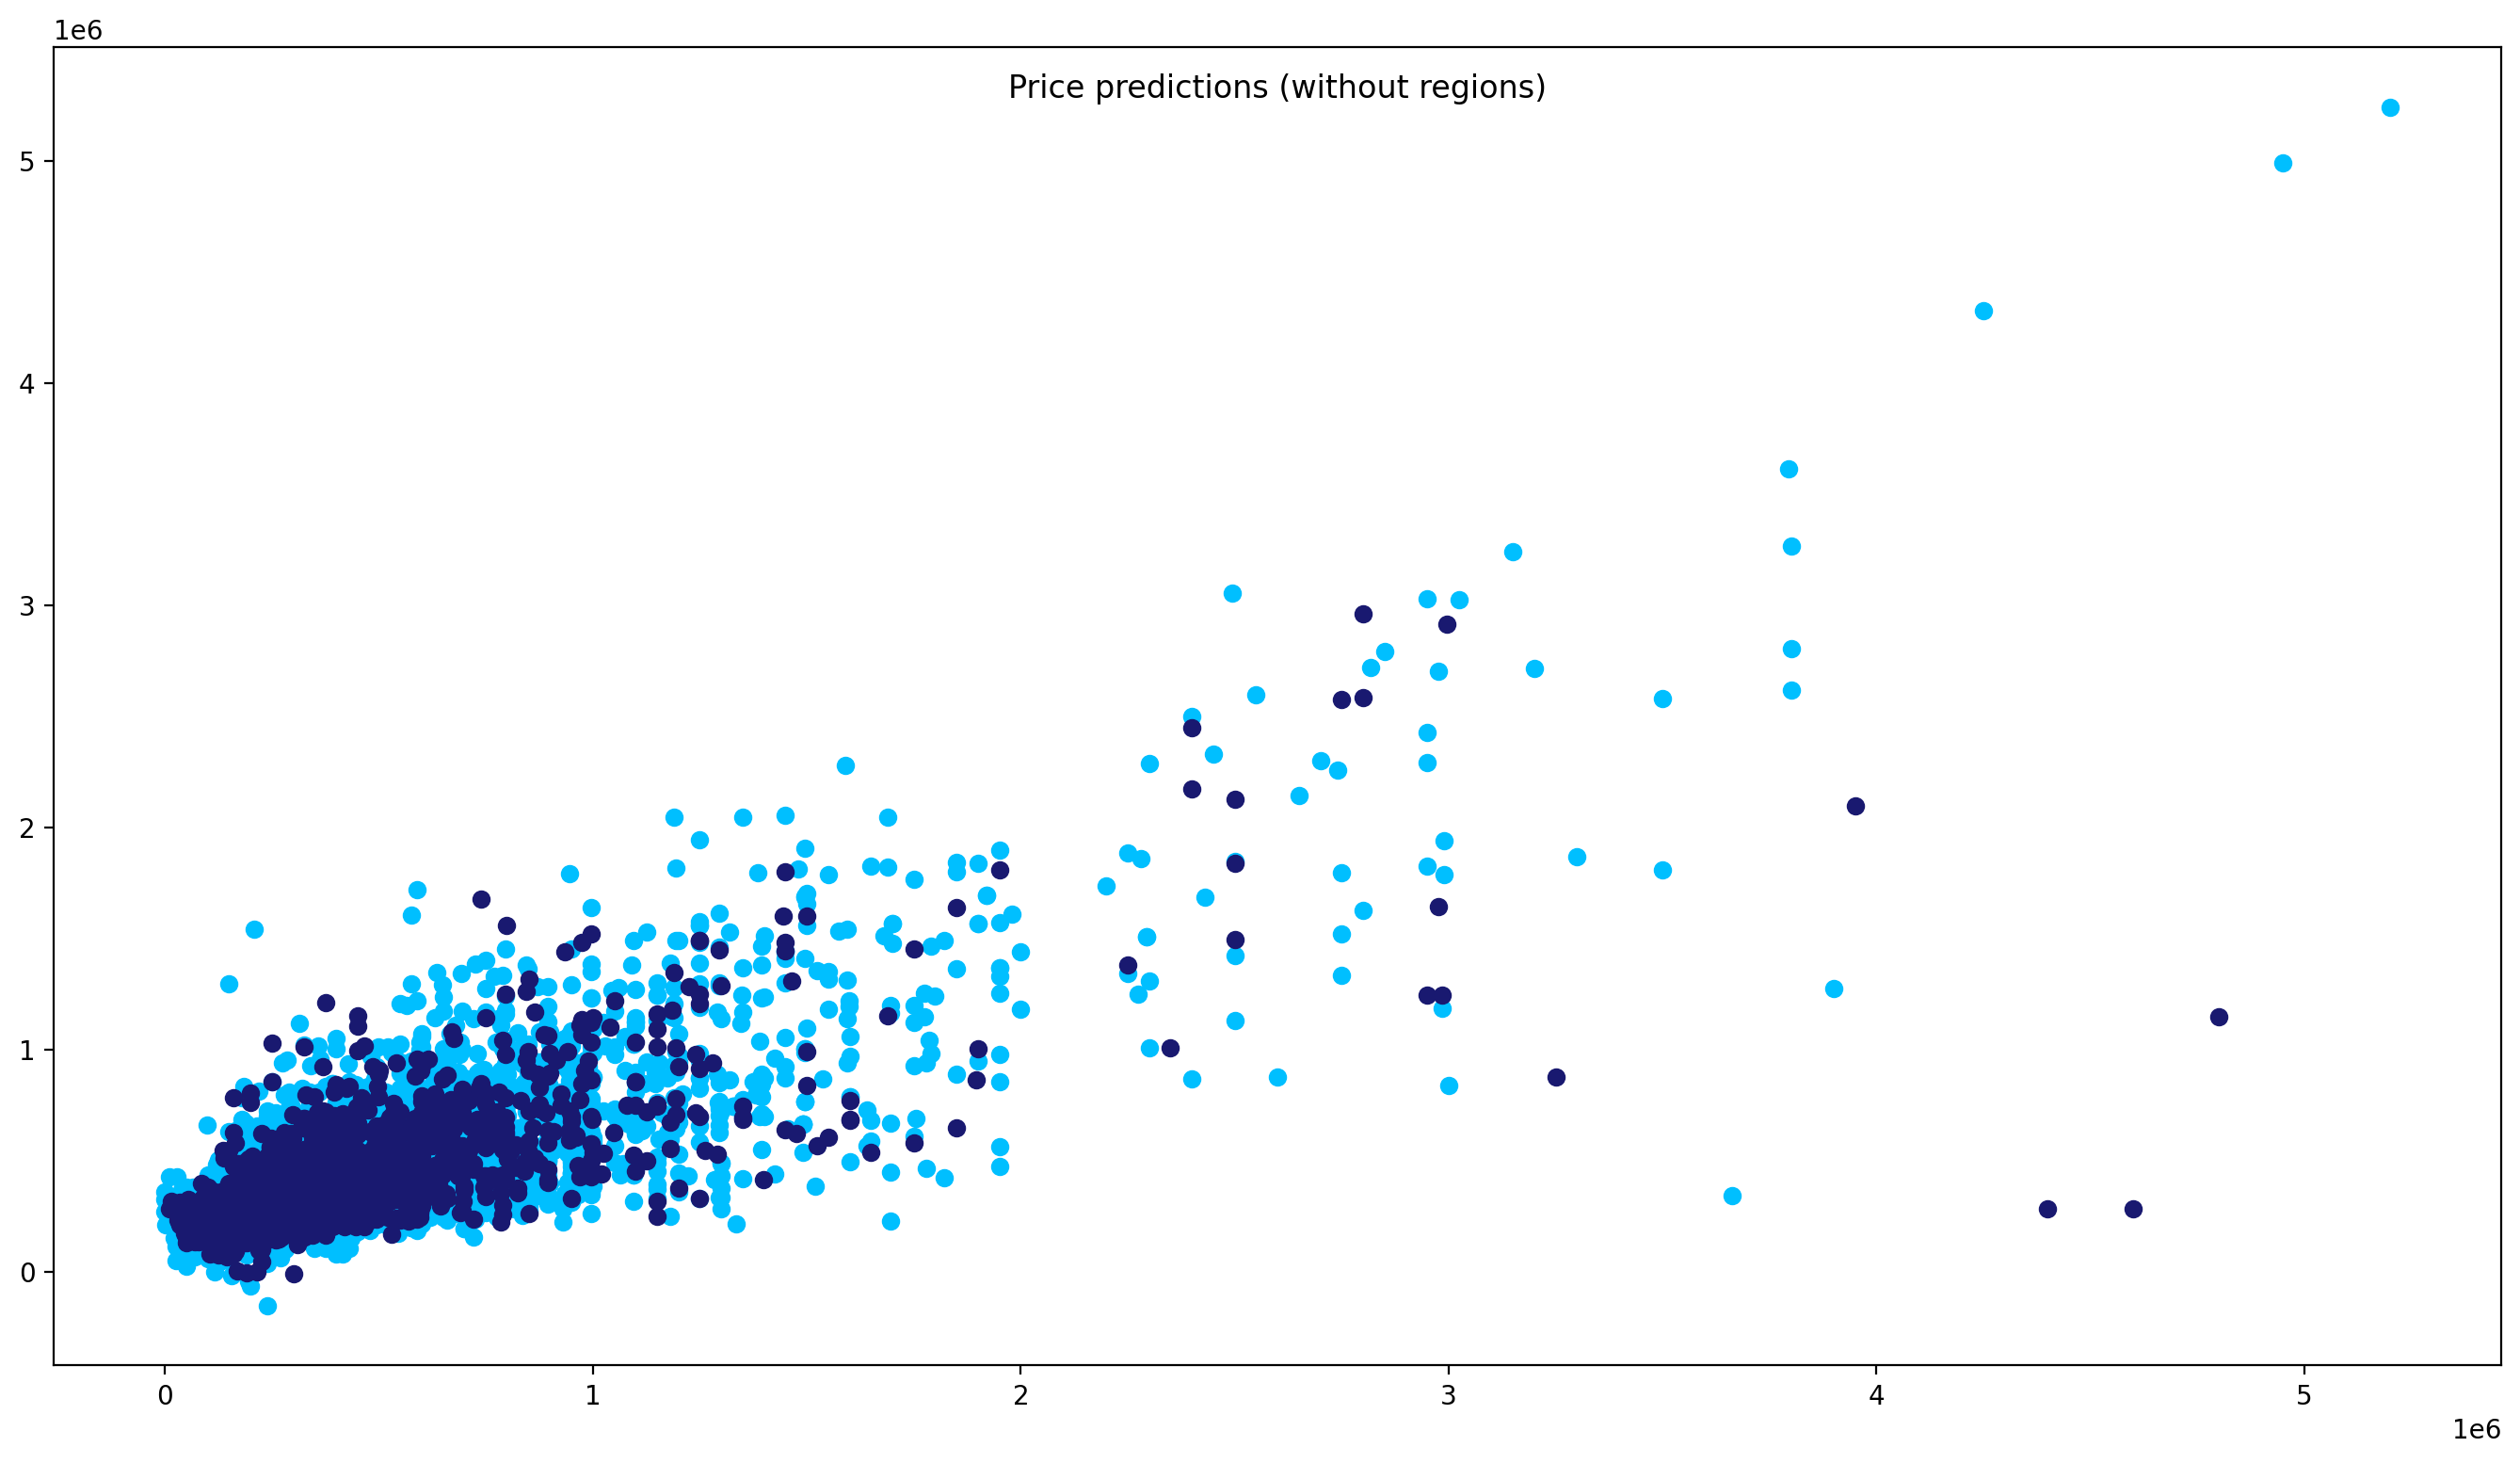

In [311]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Price predictions (without regions)")


plt.scatter(y_train, poly_reg.predict(X_train), color="deepskyblue")
plt.scatter(y_test, y_pred,color="midnightblue")


plt.show()

---